<a href="https://colab.research.google.com/github/hryshn/ECE539/blob/main/539_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Readme

''' 
Class labels: happiness, sadness, surprise, disgust, fear, neutral, anger

1. Preprocessing
Dataset format: png files
https://www.kaggle.com/datasets/deadskull7/fer2013
2. Create model
# https://github.com/atulapra/Emotion-detection
3. Train & test
4. Real time simulation

To Do: 
Demo procedure
Customizing the categories

Binary classification of errorneous face
Mixed emotion and the trigger of emotions
'''

' \nClass labels: happiness, sadness, surprise, disgust, fear, neutral, anger\n\n1. Clean data = Preprocessing\nDataset format: png files\n2. Create model\n# https://github.com/atulapra/Emotion-detection\n3. Train & test\n\nTBD: Game procedure for demo\nBinary classification of errorneous face\nCustomizing the categories\nMixed emotion and the trigger of emotions\n'

Module Import

In [ ]:
# Import modules
import numpy as np
import pandas as pd 
from PIL import Image
from tqdm import tqdm
import argparse
import matplotlib.pyplot as plt
import cv2
import datetime
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import KFold, StratifiedKFold
import os

Import Dataset

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [ ]:
!pwd

/content


In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content'
# !kaggle datasets download -d ananthu017/emotion-detection-fer
!kaggle datasets download -d deadskull7/fer2013

 92% 89.0M/96.6M [00:01<00:00, 97.5MB/s]
100% 96.6M/96.6M [00:01<00:00, 75.3MB/s]


In [ ]:
!unzip '/content/fer2013.zip'

Archive:  /content/fer2013.zip
  inflating: fer2013.csv             


Setup

In [ ]:
# convert string to integer
def atoi(s):
    n = 0
    for i in s:
        n = n*10 + ord(i) - ord("0")
    return n

In [ ]:
data_augmentation = Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),
  layers.RandomBrightness(0.9),
  layers.RandomZoom(height_factor=0.2, width_factor=0.2)
])

In [ ]:
# making folders
outer_names = ['test','train']
inner_names = ['angry', 'disgusted', 'fearful', 'happy', 'sad', 'surprised', 'neutral']
os.makedirs('data', exist_ok=True)
for outer_name in outer_names:
    os.makedirs(os.path.join('data',outer_name), exist_ok=True)
    for inner_name in inner_names:
        os.makedirs(os.path.join('data',outer_name,inner_name), exist_ok=True)

In [ ]:
# to keep count of each category
angry = 0
disgusted = 0
fearful = 0
happy = 0
sad = 0
surprised = 0
neutral = 0
angry_test = 0
disgusted_test = 0
fearful_test = 0
happy_test = 0
sad_test = 0
surprised_test = 0
neutral_test = 0

csv -> png

In [ ]:
df = pd.read_csv('./fer2013.csv')
mat = np.zeros((48,48),dtype=np.uint8)
print("Saving images...")

# K-fold cross validation
skf = StratifiedKFold(n_splits = 5, random_state = 7, shuffle = True) 
Y = df['emotion']
y = np.zeros(28709)

# read the csv file line by line
for i in tqdm(range(len(df))):
  txt = df['pixels'][i]
  words = txt.split()
  
  # the image size is 48x48
  for j in range(2304):
      xind = j // 48
      yind = j % 48
      mat[xind][yind] = atoi(words[j])

  img = Image.fromarray(mat)

  # train
  if i < 28709:
      y[i] = Y[i]
      if Y[i] == 0:
          img.save('data/train/angry/im'+str(angry)+'.png')
          img.save('SKF/'+str(angry)+'.png')
          angry += 1
      elif Y[i] == 1:
          img.save('data/train/disgusted/im'+str(disgusted)+'.png')
          img.save('SKF/'+str(disgusted)+'.png')
          disgusted += 1
      elif Y[i] == 2:
          img.save('data/train/fearful/im'+str(fearful)+'.png')
          img.save('SKF/'+str(fearful)+'.png')
          fearful += 1
      elif Y[i] == 3:
          img.save('data/train/happy/im'+str(happy)+'.png')
          img.save('SKF/'+str(happy)+'.png')
          happy += 1
      elif Y[i] == 4:
          img.save('data/train/sad/im'+str(sad)+'.png')
          img.save('SKF/'+str(sad)+'.png')
          sad += 1
      elif Y[i] == 5:
          img.save('data/train/surprised/im'+str(surprised)+'.png')
          img.save('SKF/'+str(surprised)+'.png')
          surprised += 1
      elif Y[i] == 6:
          img.save('data/train/neutral/im'+str(neutral)+'.png')
          img.save('SKF/'+str(neutral)+'.png')
          neutral += 1
      else:
        break

    # test
  elif i >= 28709:
    if Y[i] == 0:
        img.save('data/test/angry/im'+str(angry_test)+'.png')
        angry_test += 1
    elif Y[i] == 1:
        img.save('data/test/disgusted/im'+str(disgusted_test)+'.png')
        disgusted_test += 1
    elif Y[i] == 2:
        img.save('data/test/fearful/im'+str(fearful_test)+'.png')
        fearful_test += 1
    elif Y[i] == 3:
        img.save('data/test/happy/im'+str(happy_test)+'.png')
        happy_test += 1
    elif Y[i] == 4:
        img.save('data/test/sad/im'+str(sad_test)+'.png')
        sad_test += 1
    elif Y[i] == 5:
        img.save('data/test/surprised/im'+str(surprised_test)+'.png')
        surprised_test += 1
    elif Y[i] == 6:
        img.save('data/test/neutral/im'+str(neutral_test)+'.png')
        neutral_test += 1


print("Done!")

Saving images...


100%|██████████| 35887/35887 [02:29<00:00, 240.01it/s]

Done!


Printing images...


100%|██████████| 9/9 [00:00<00:00,  9.15it/s]


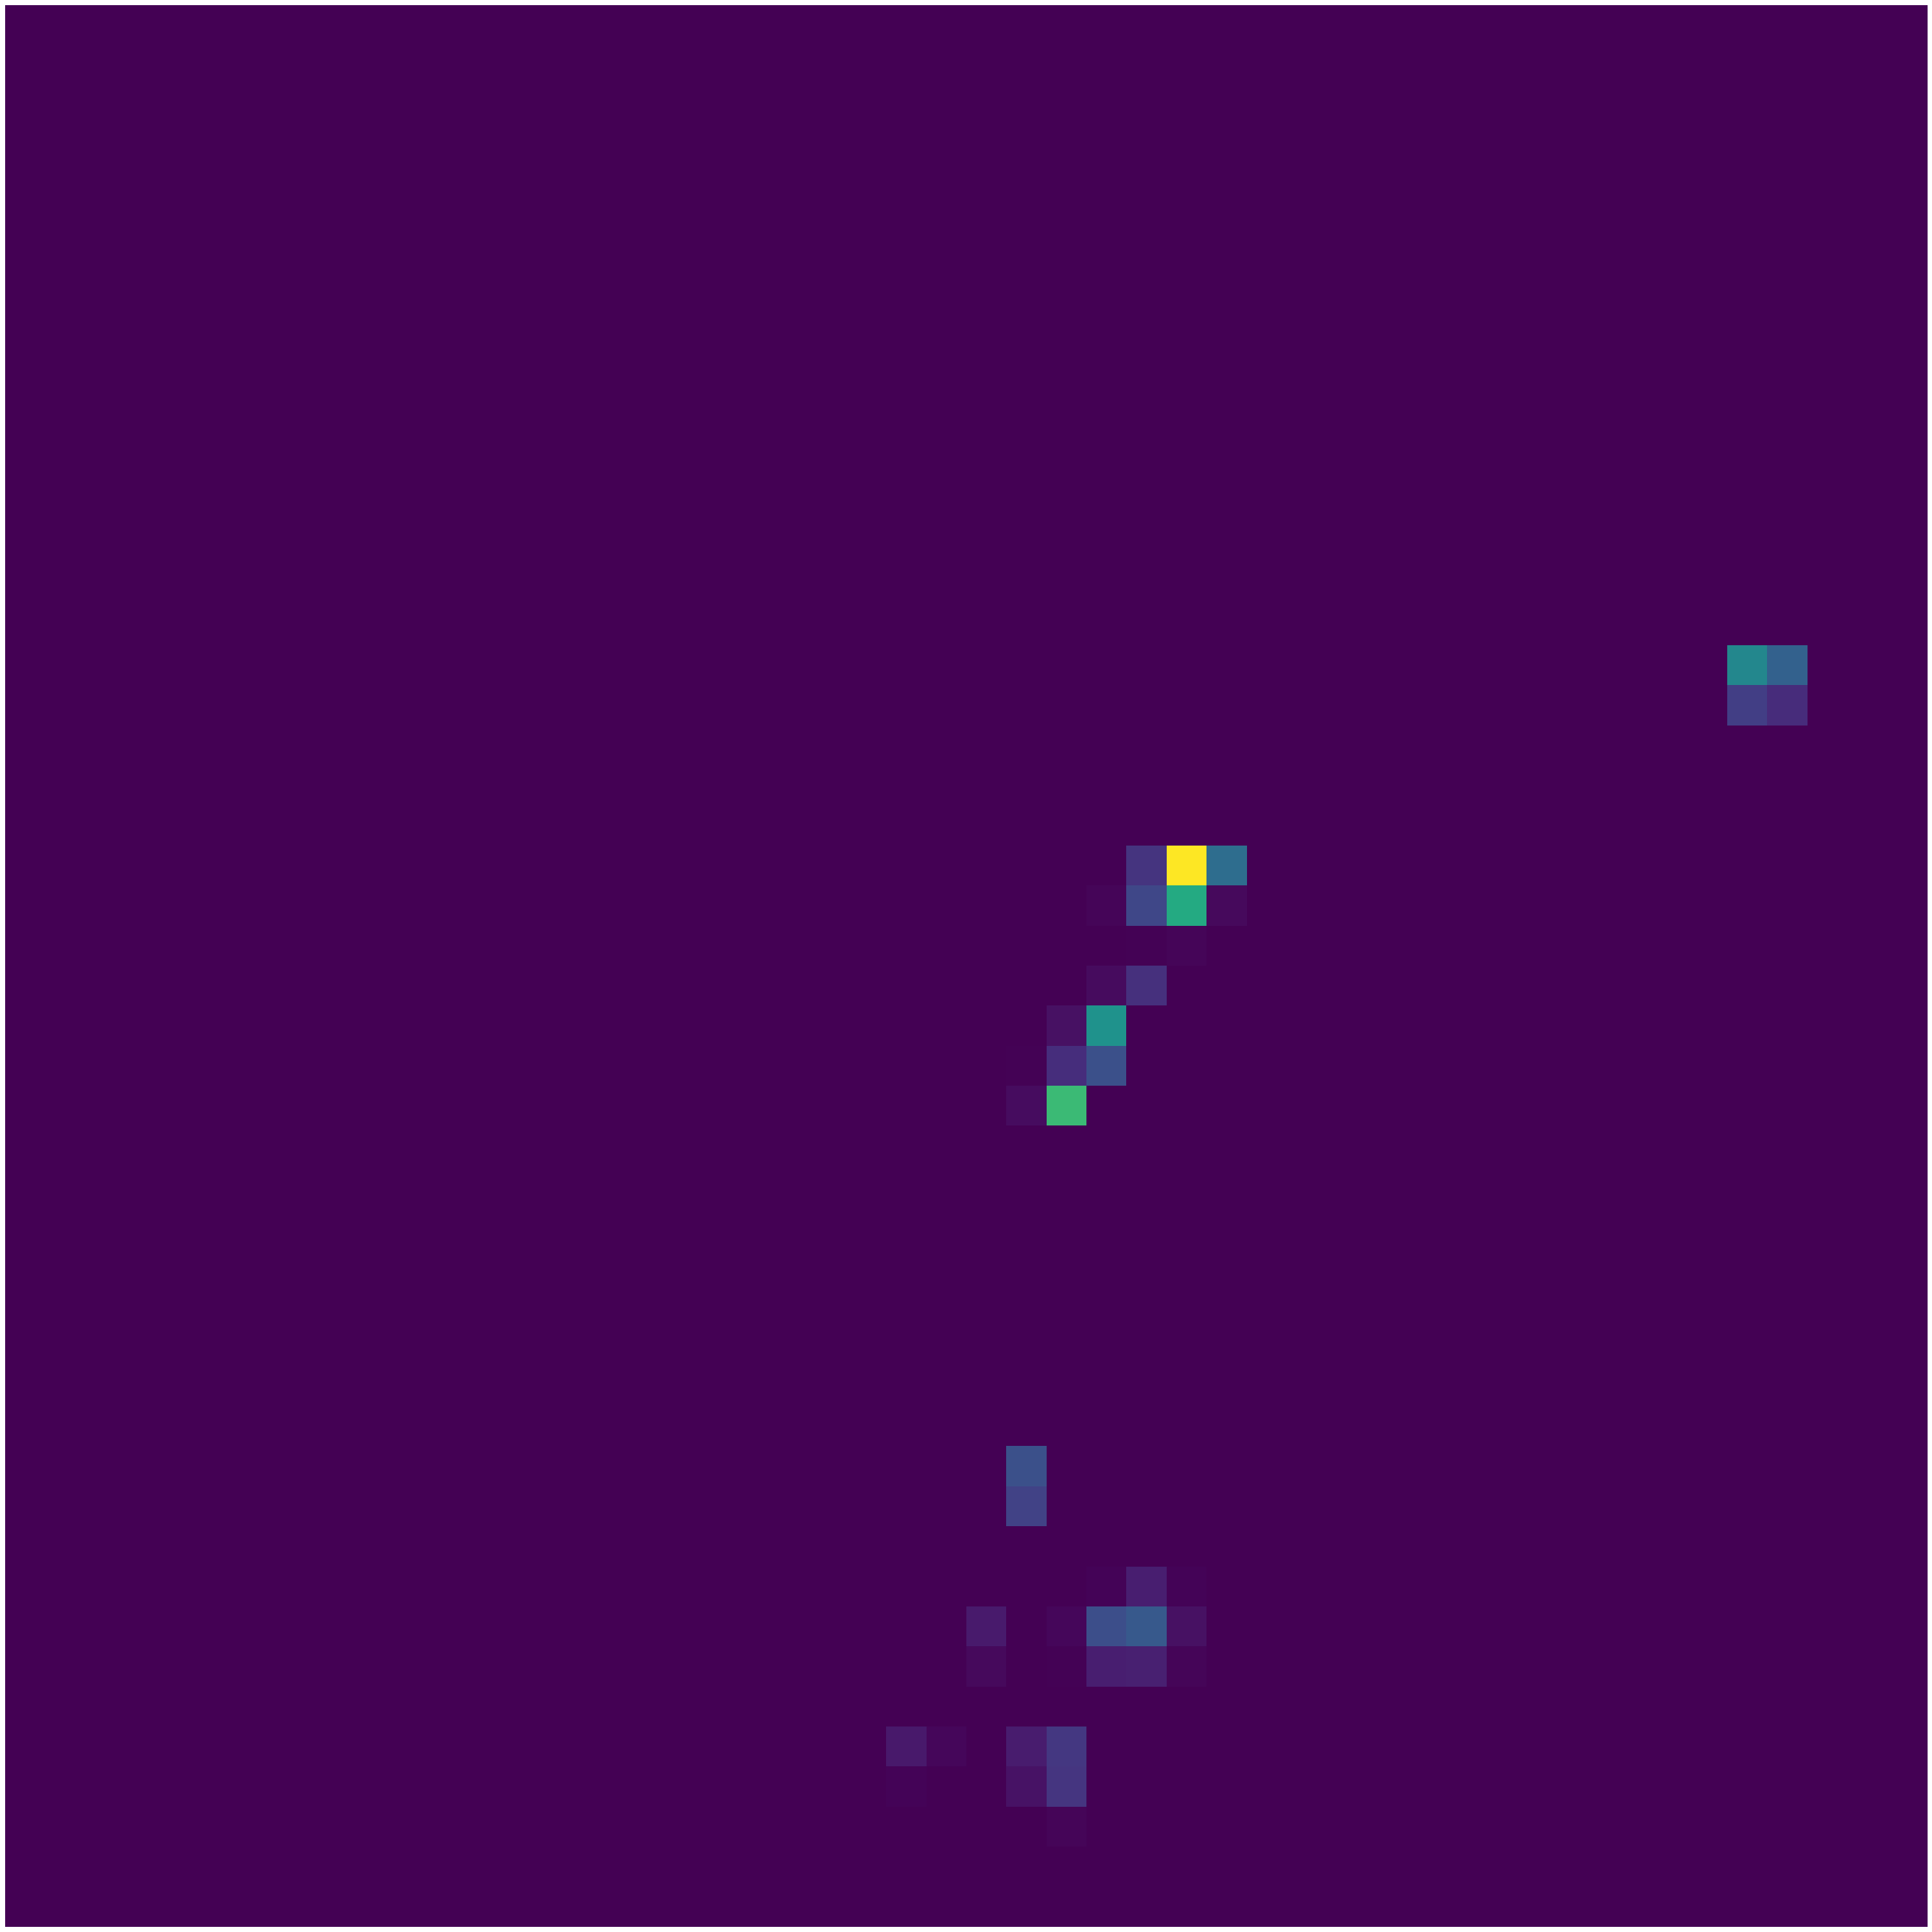

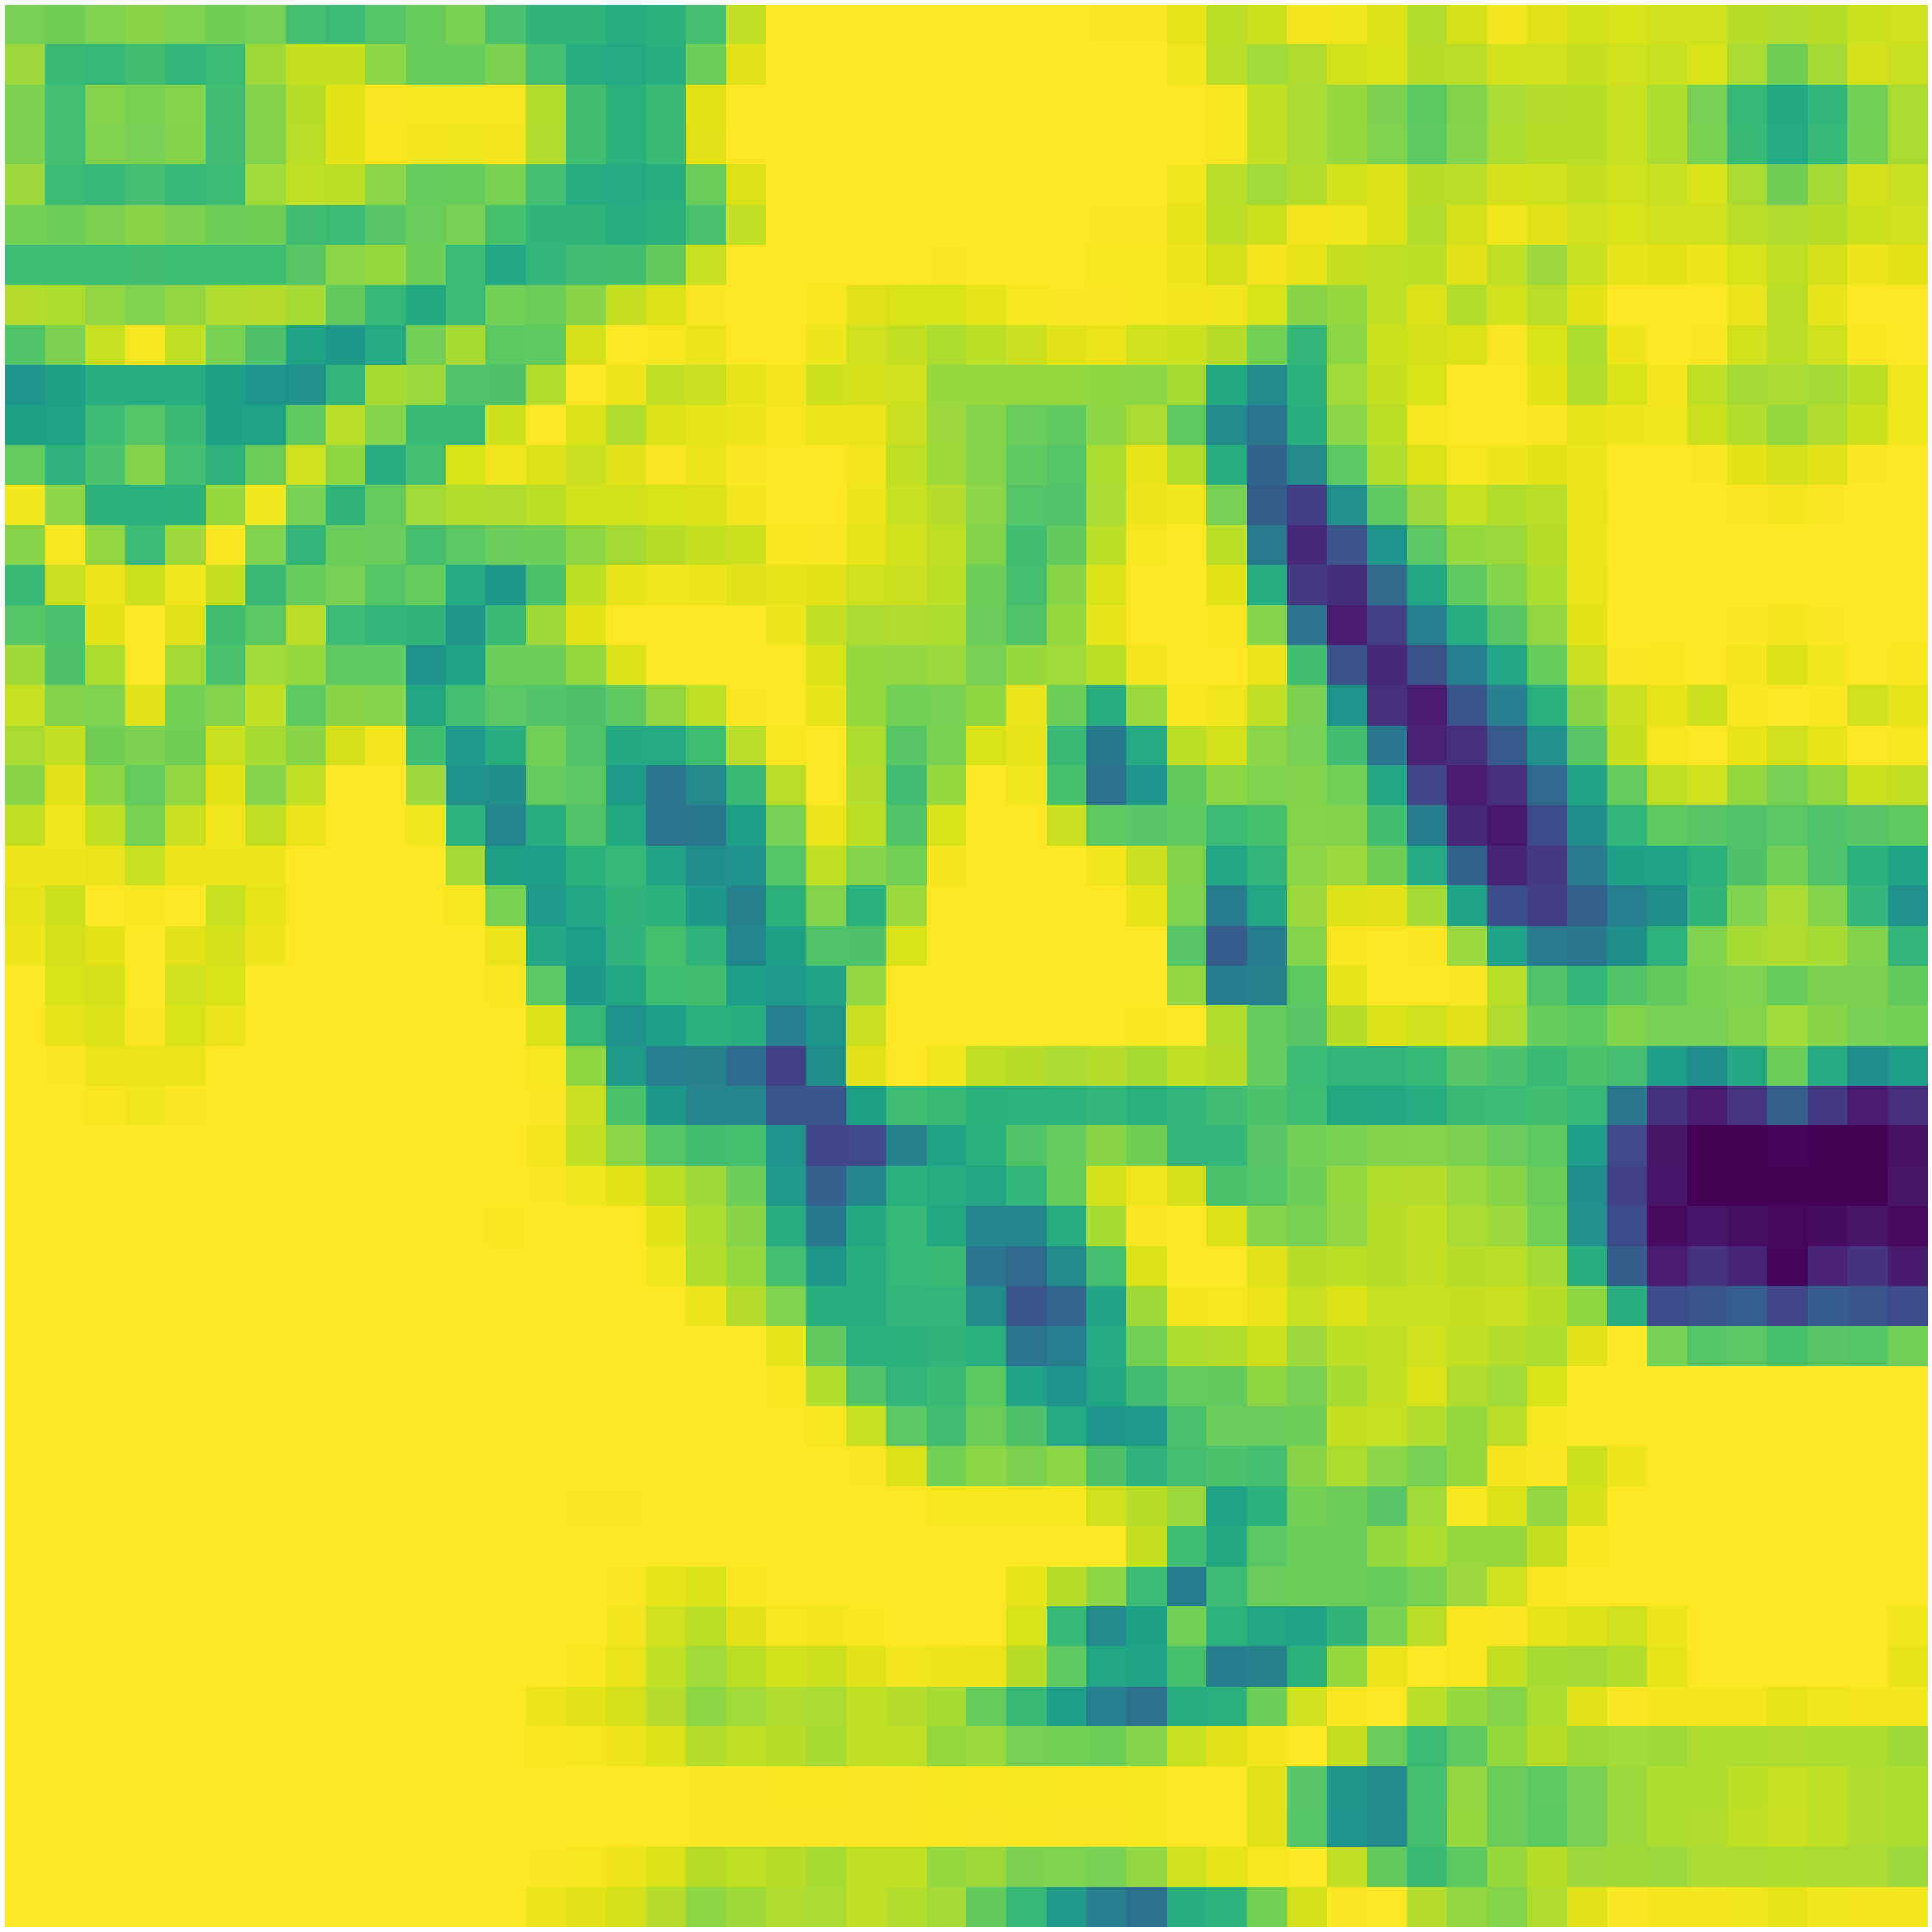

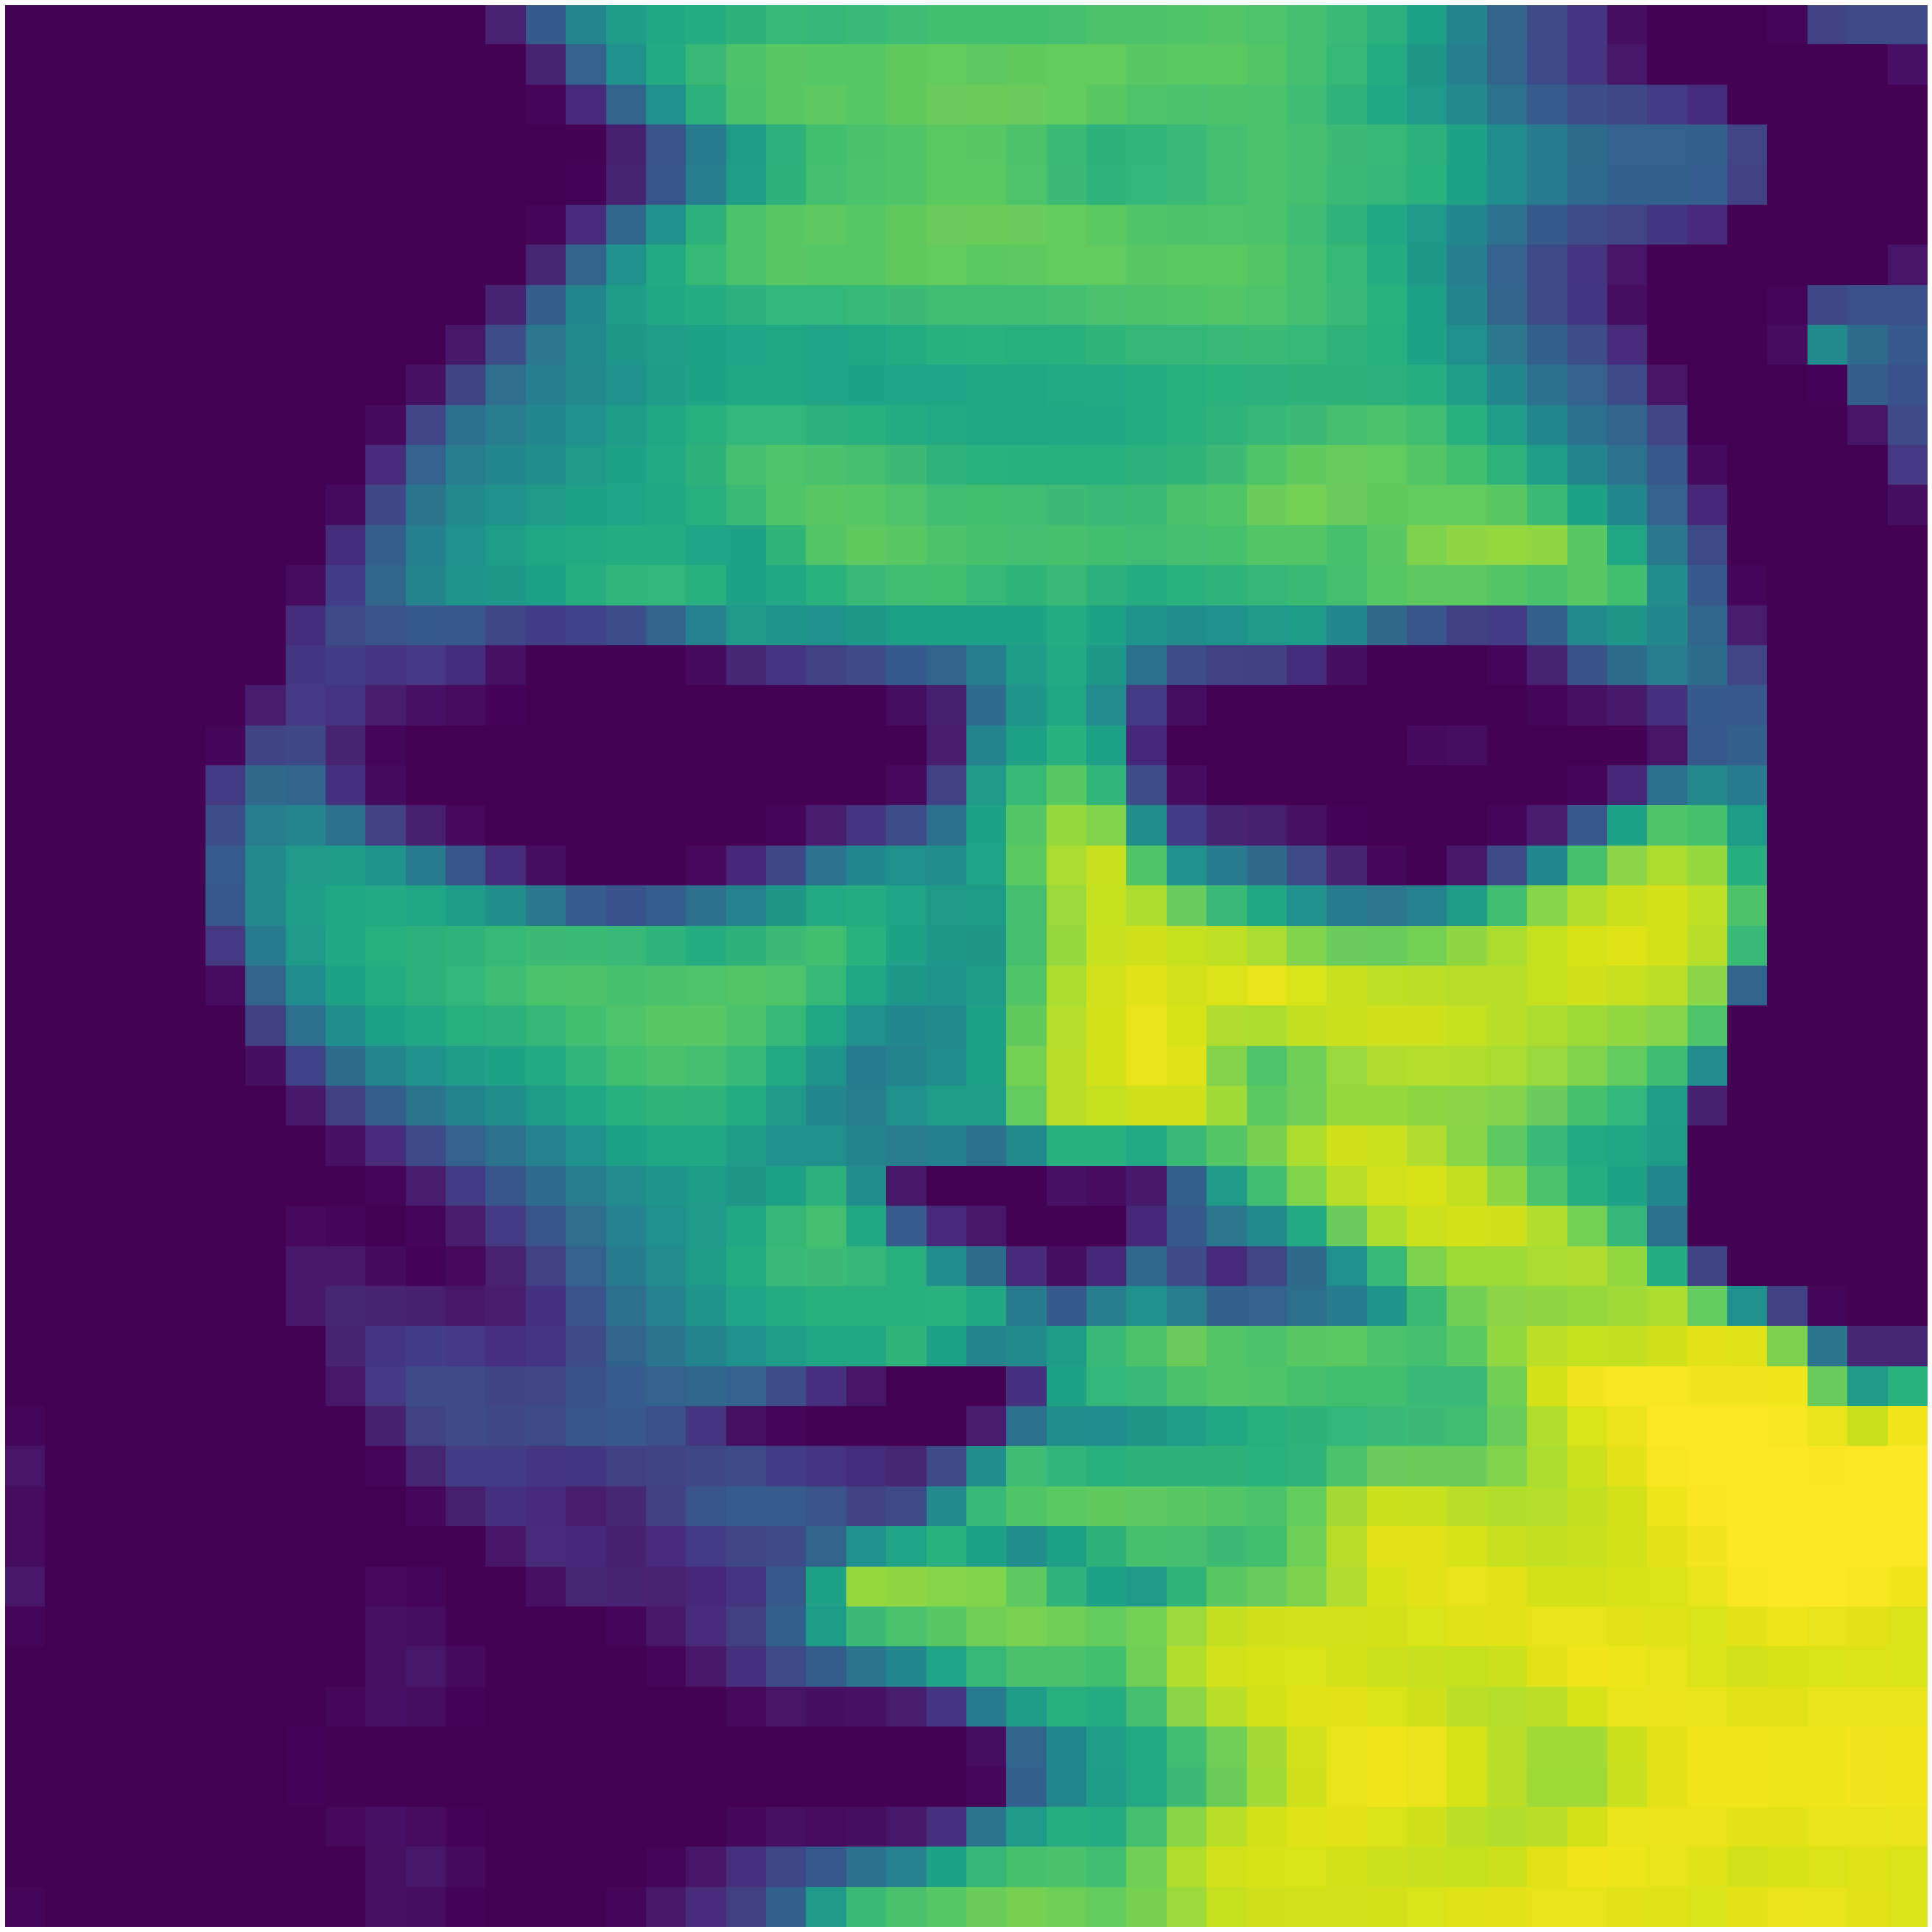

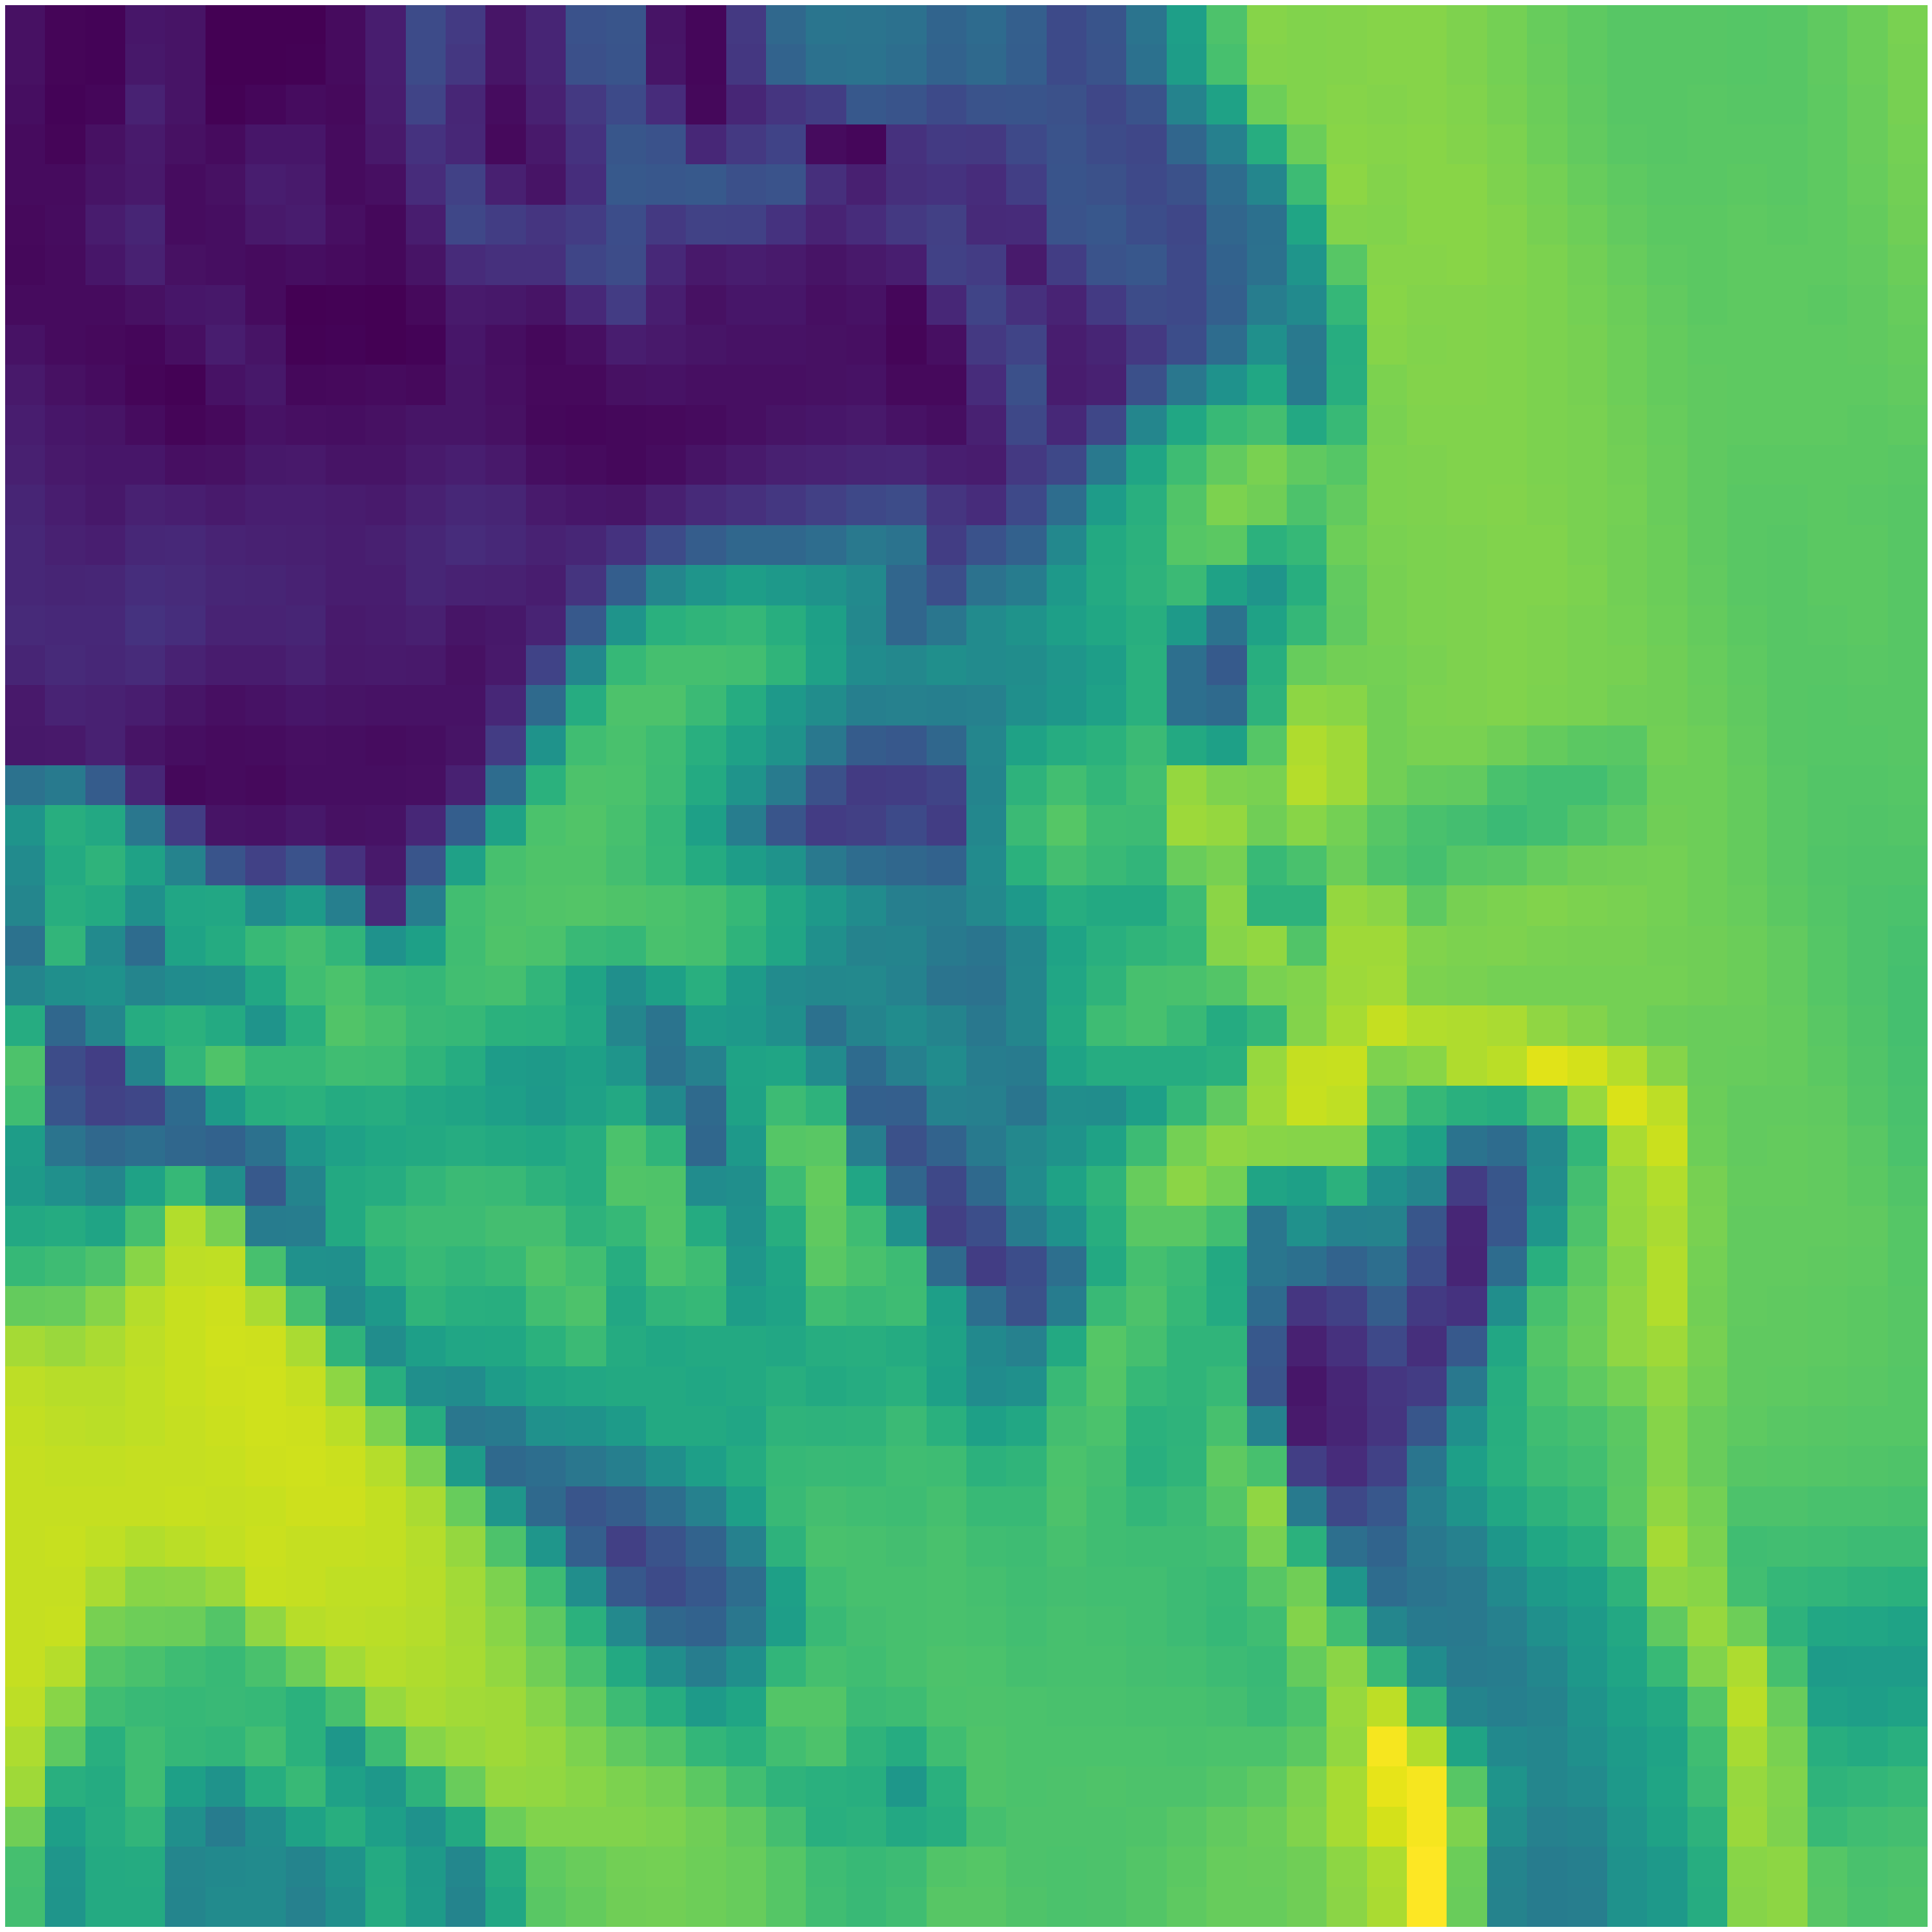

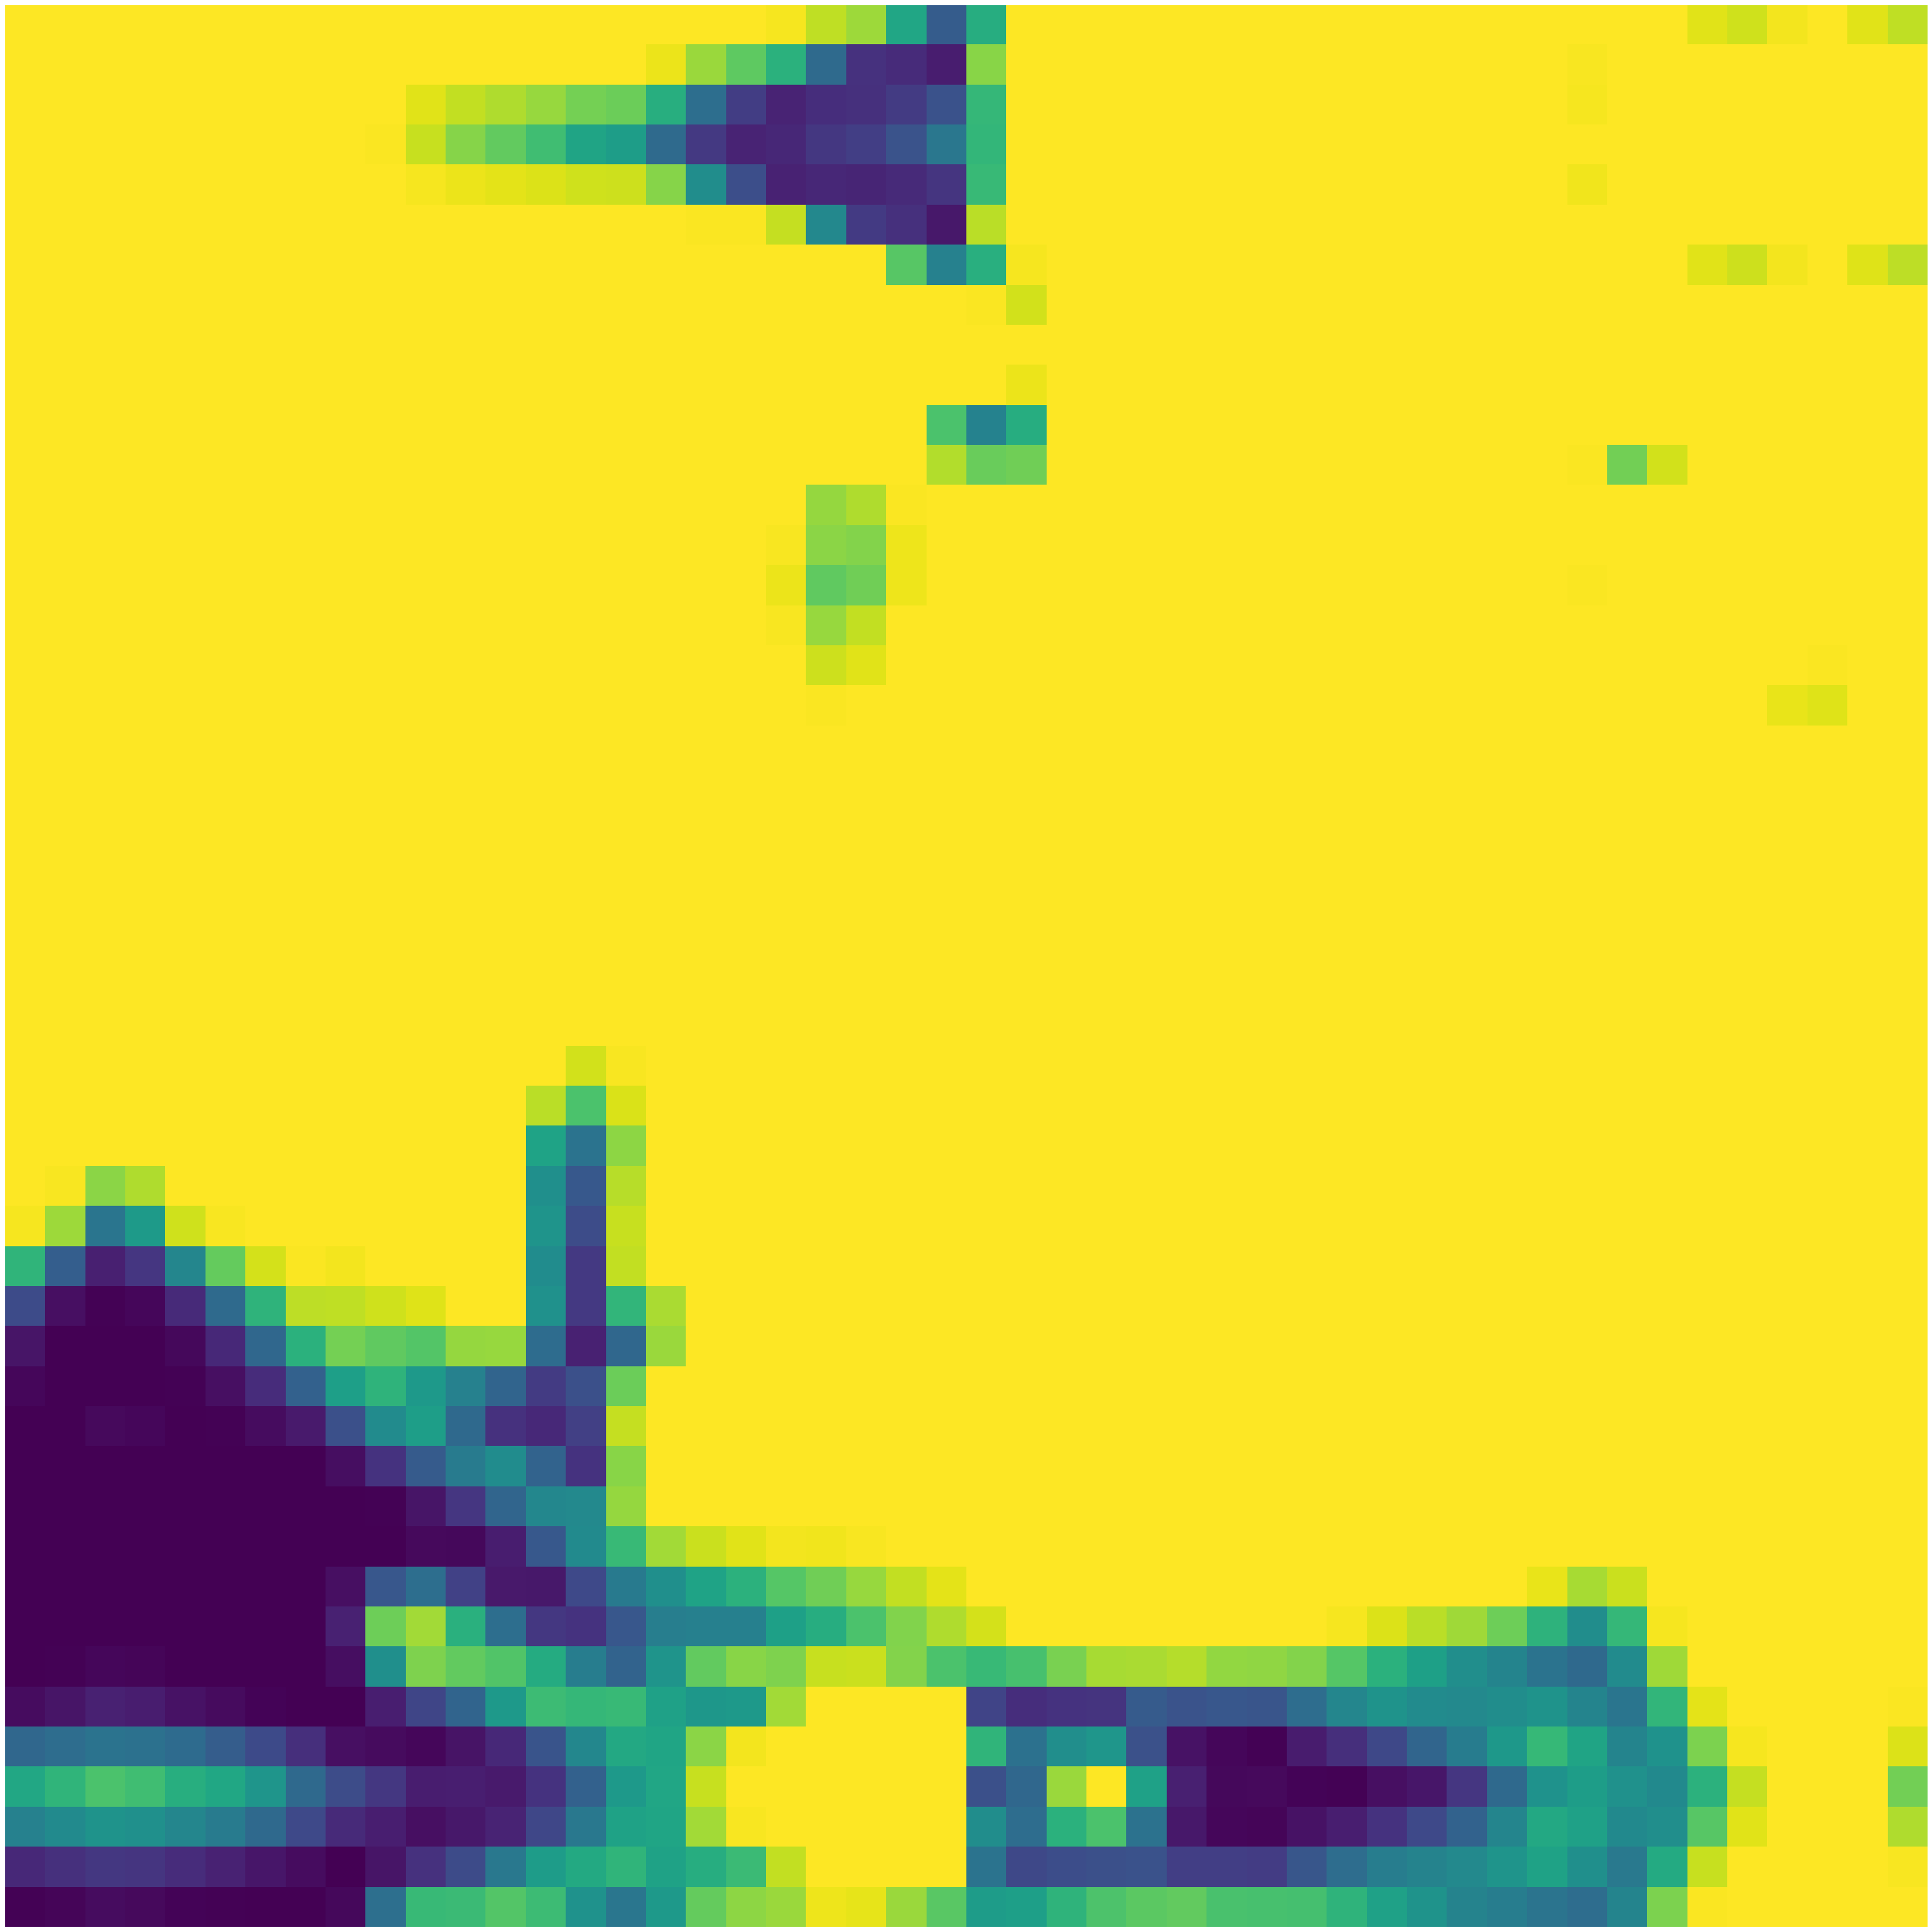

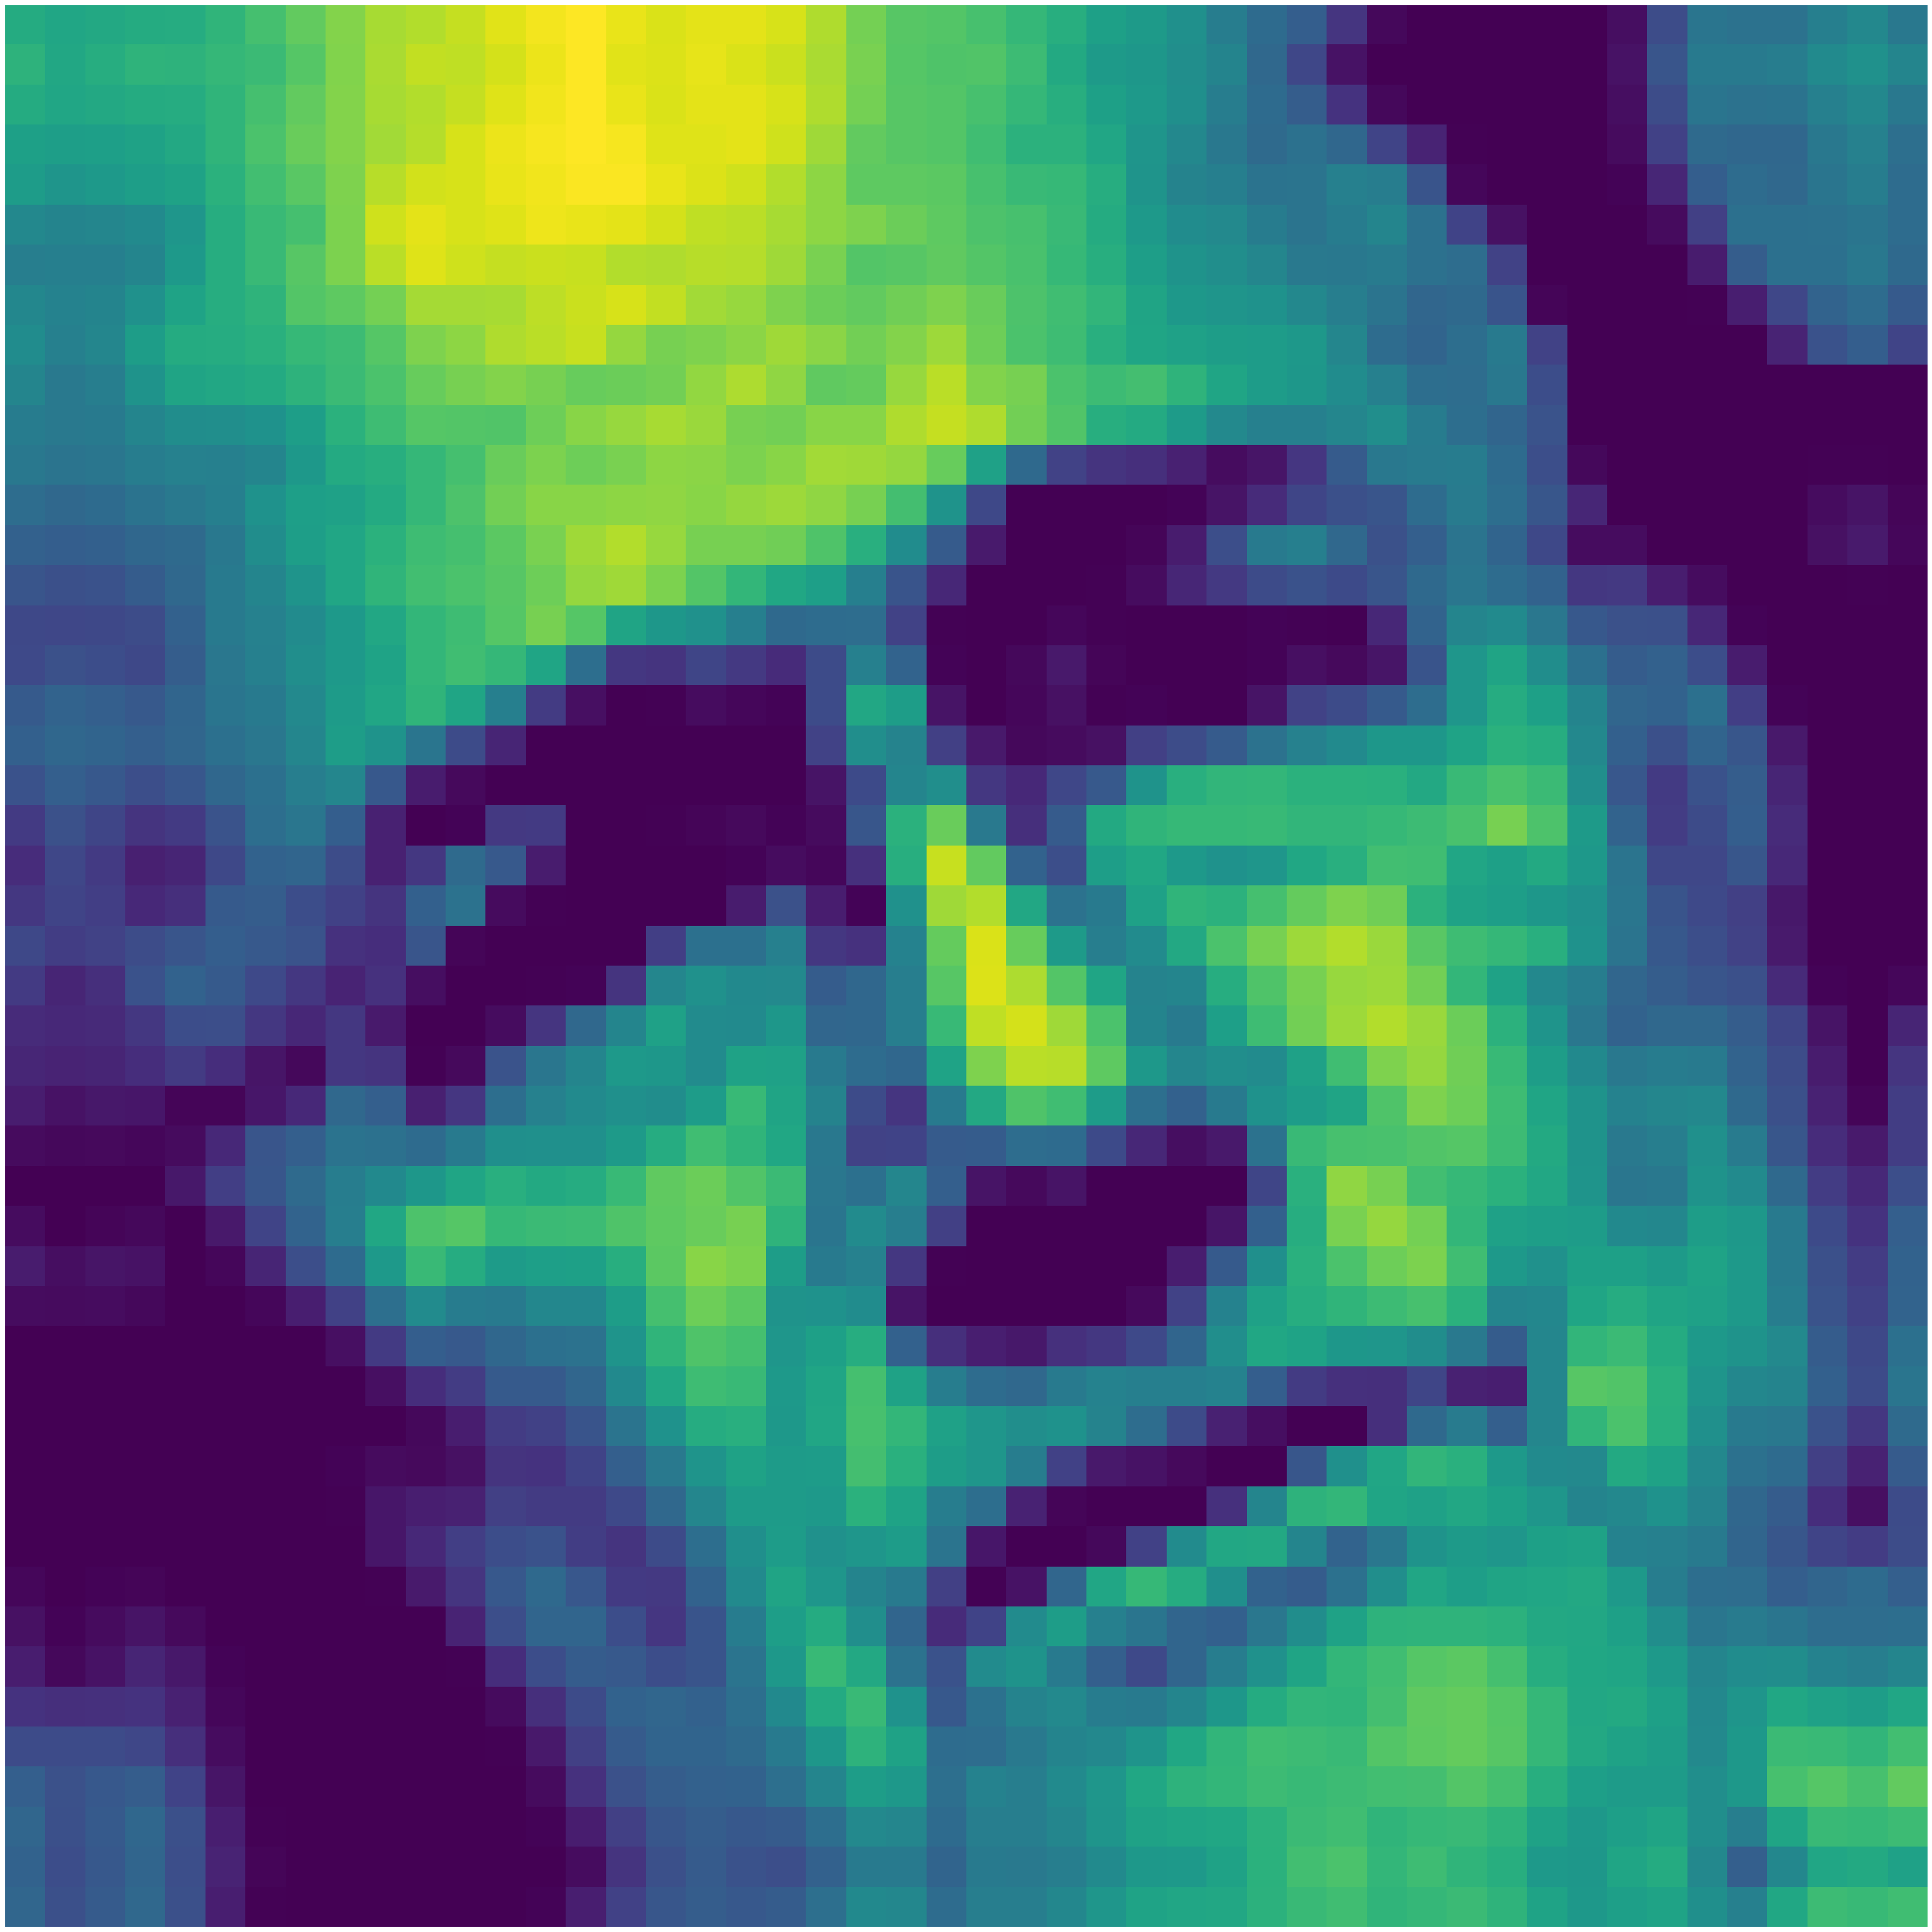

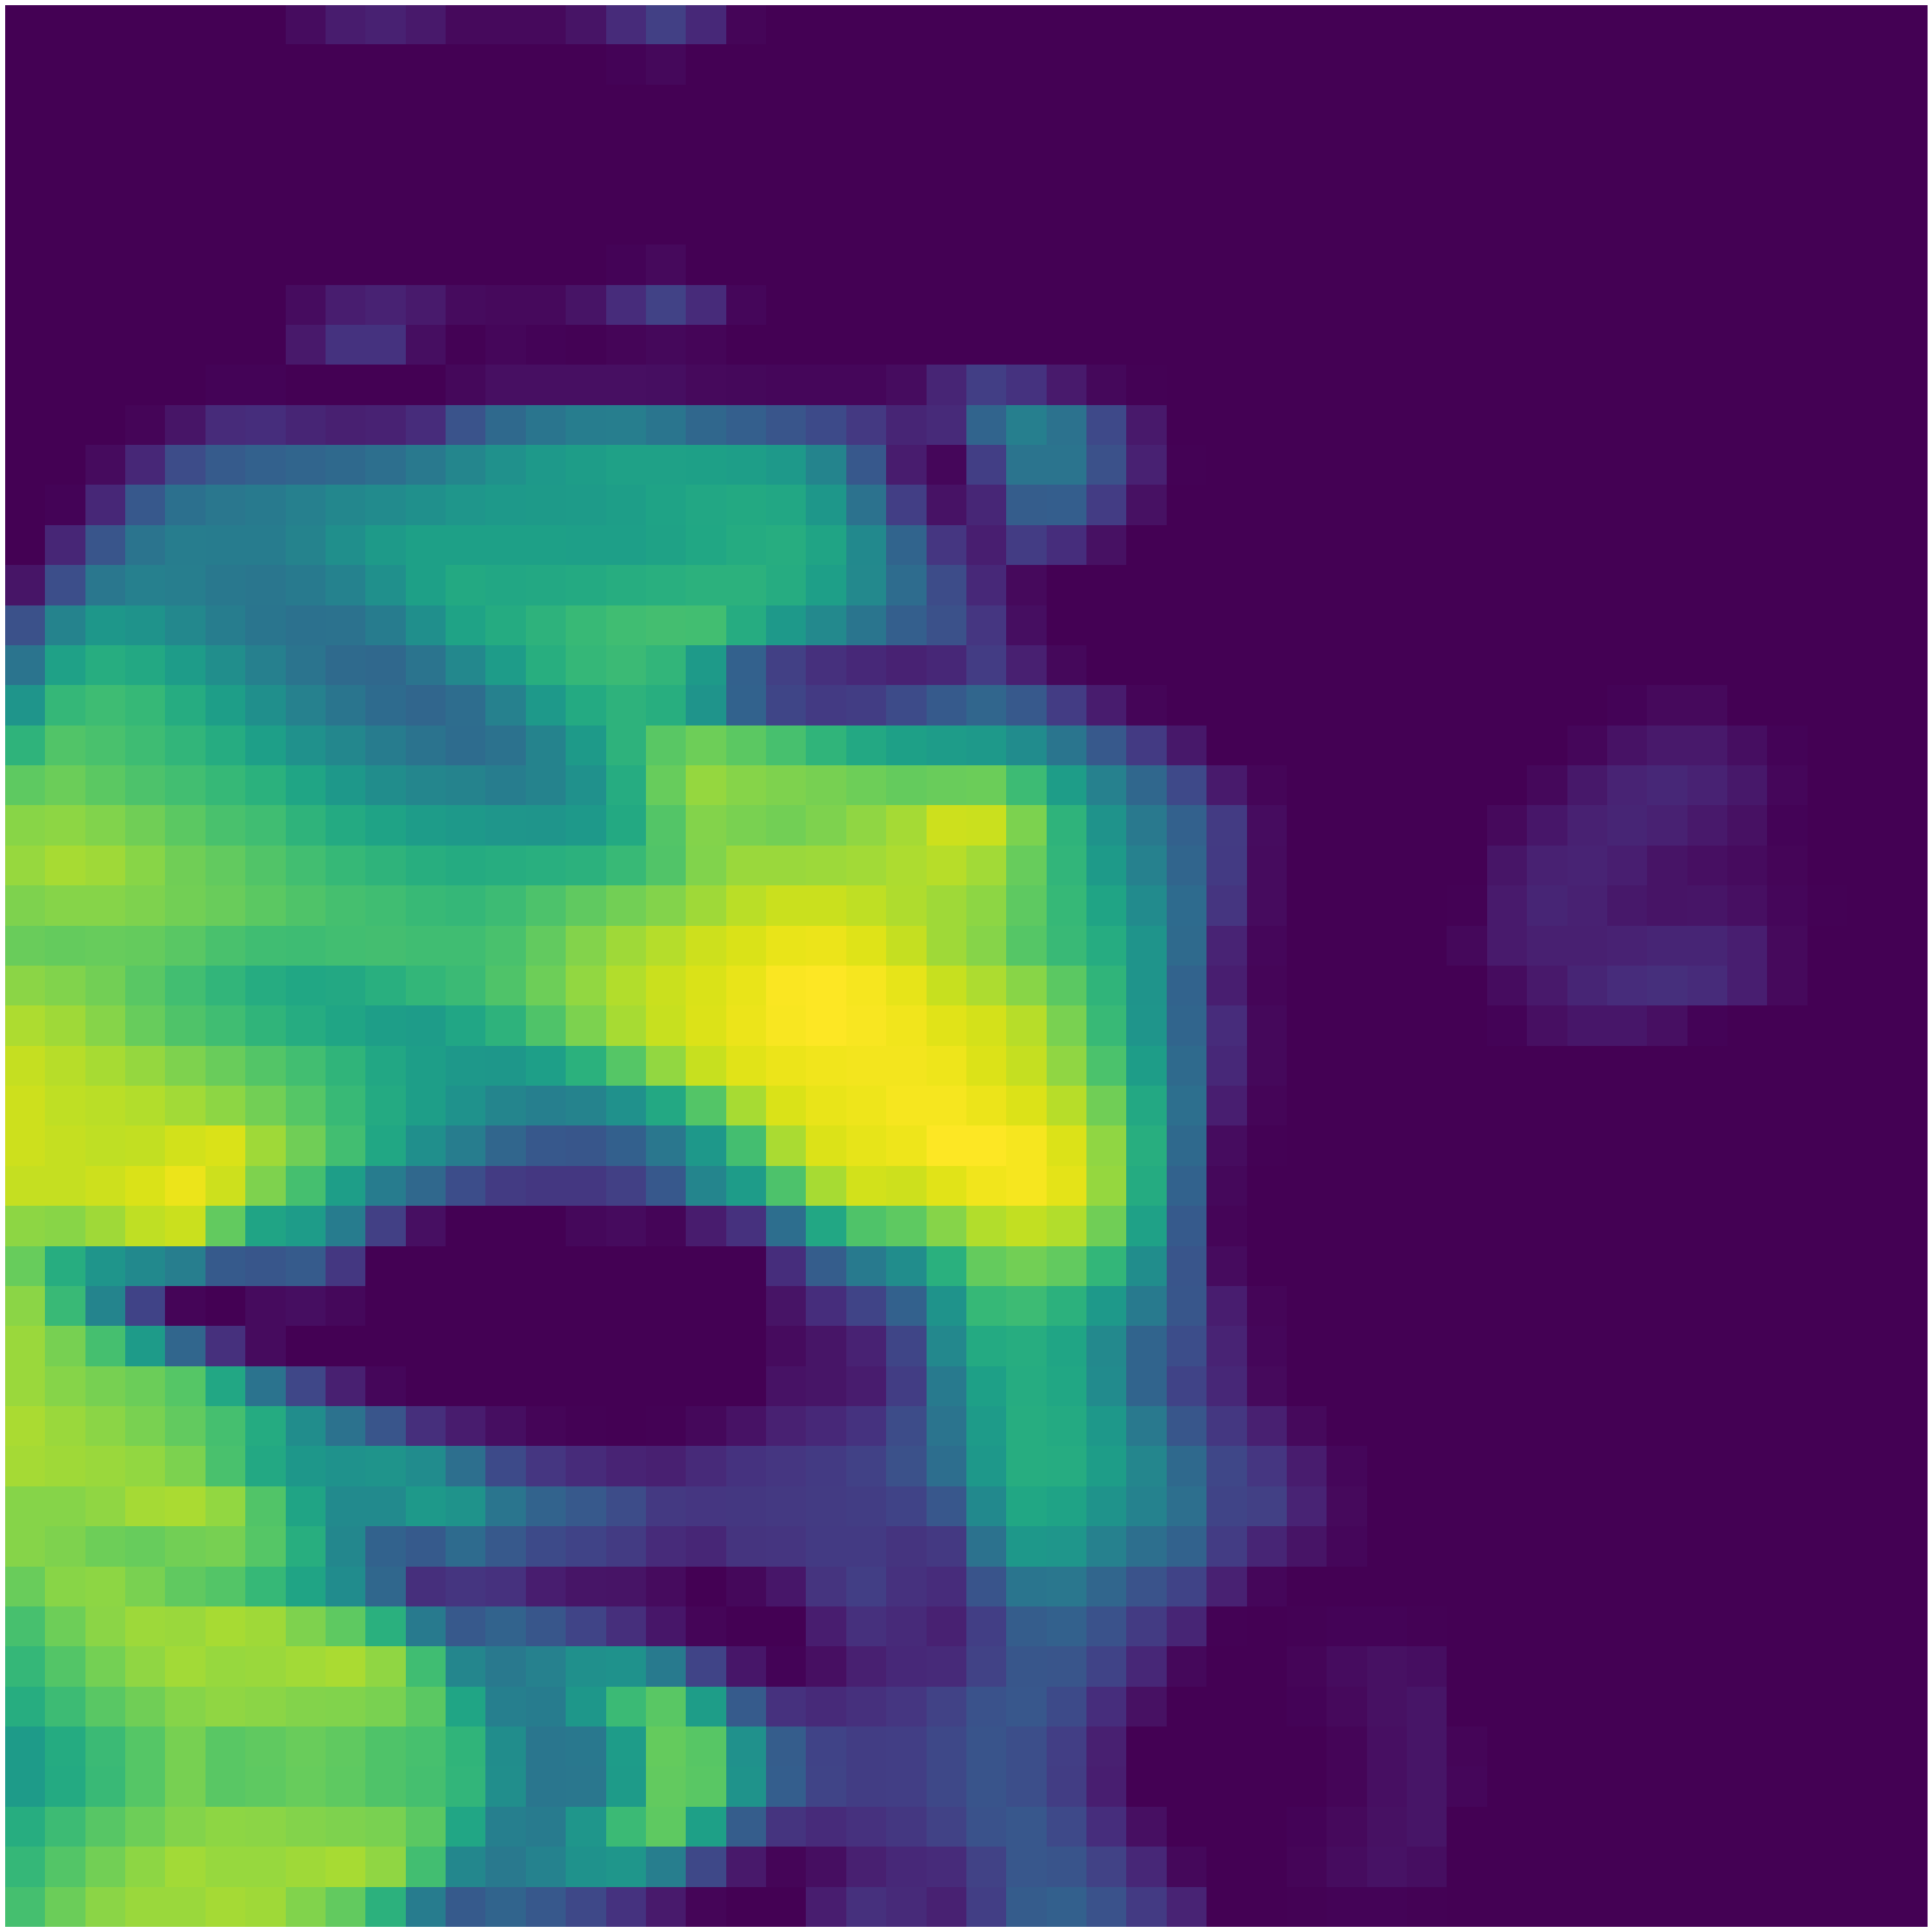

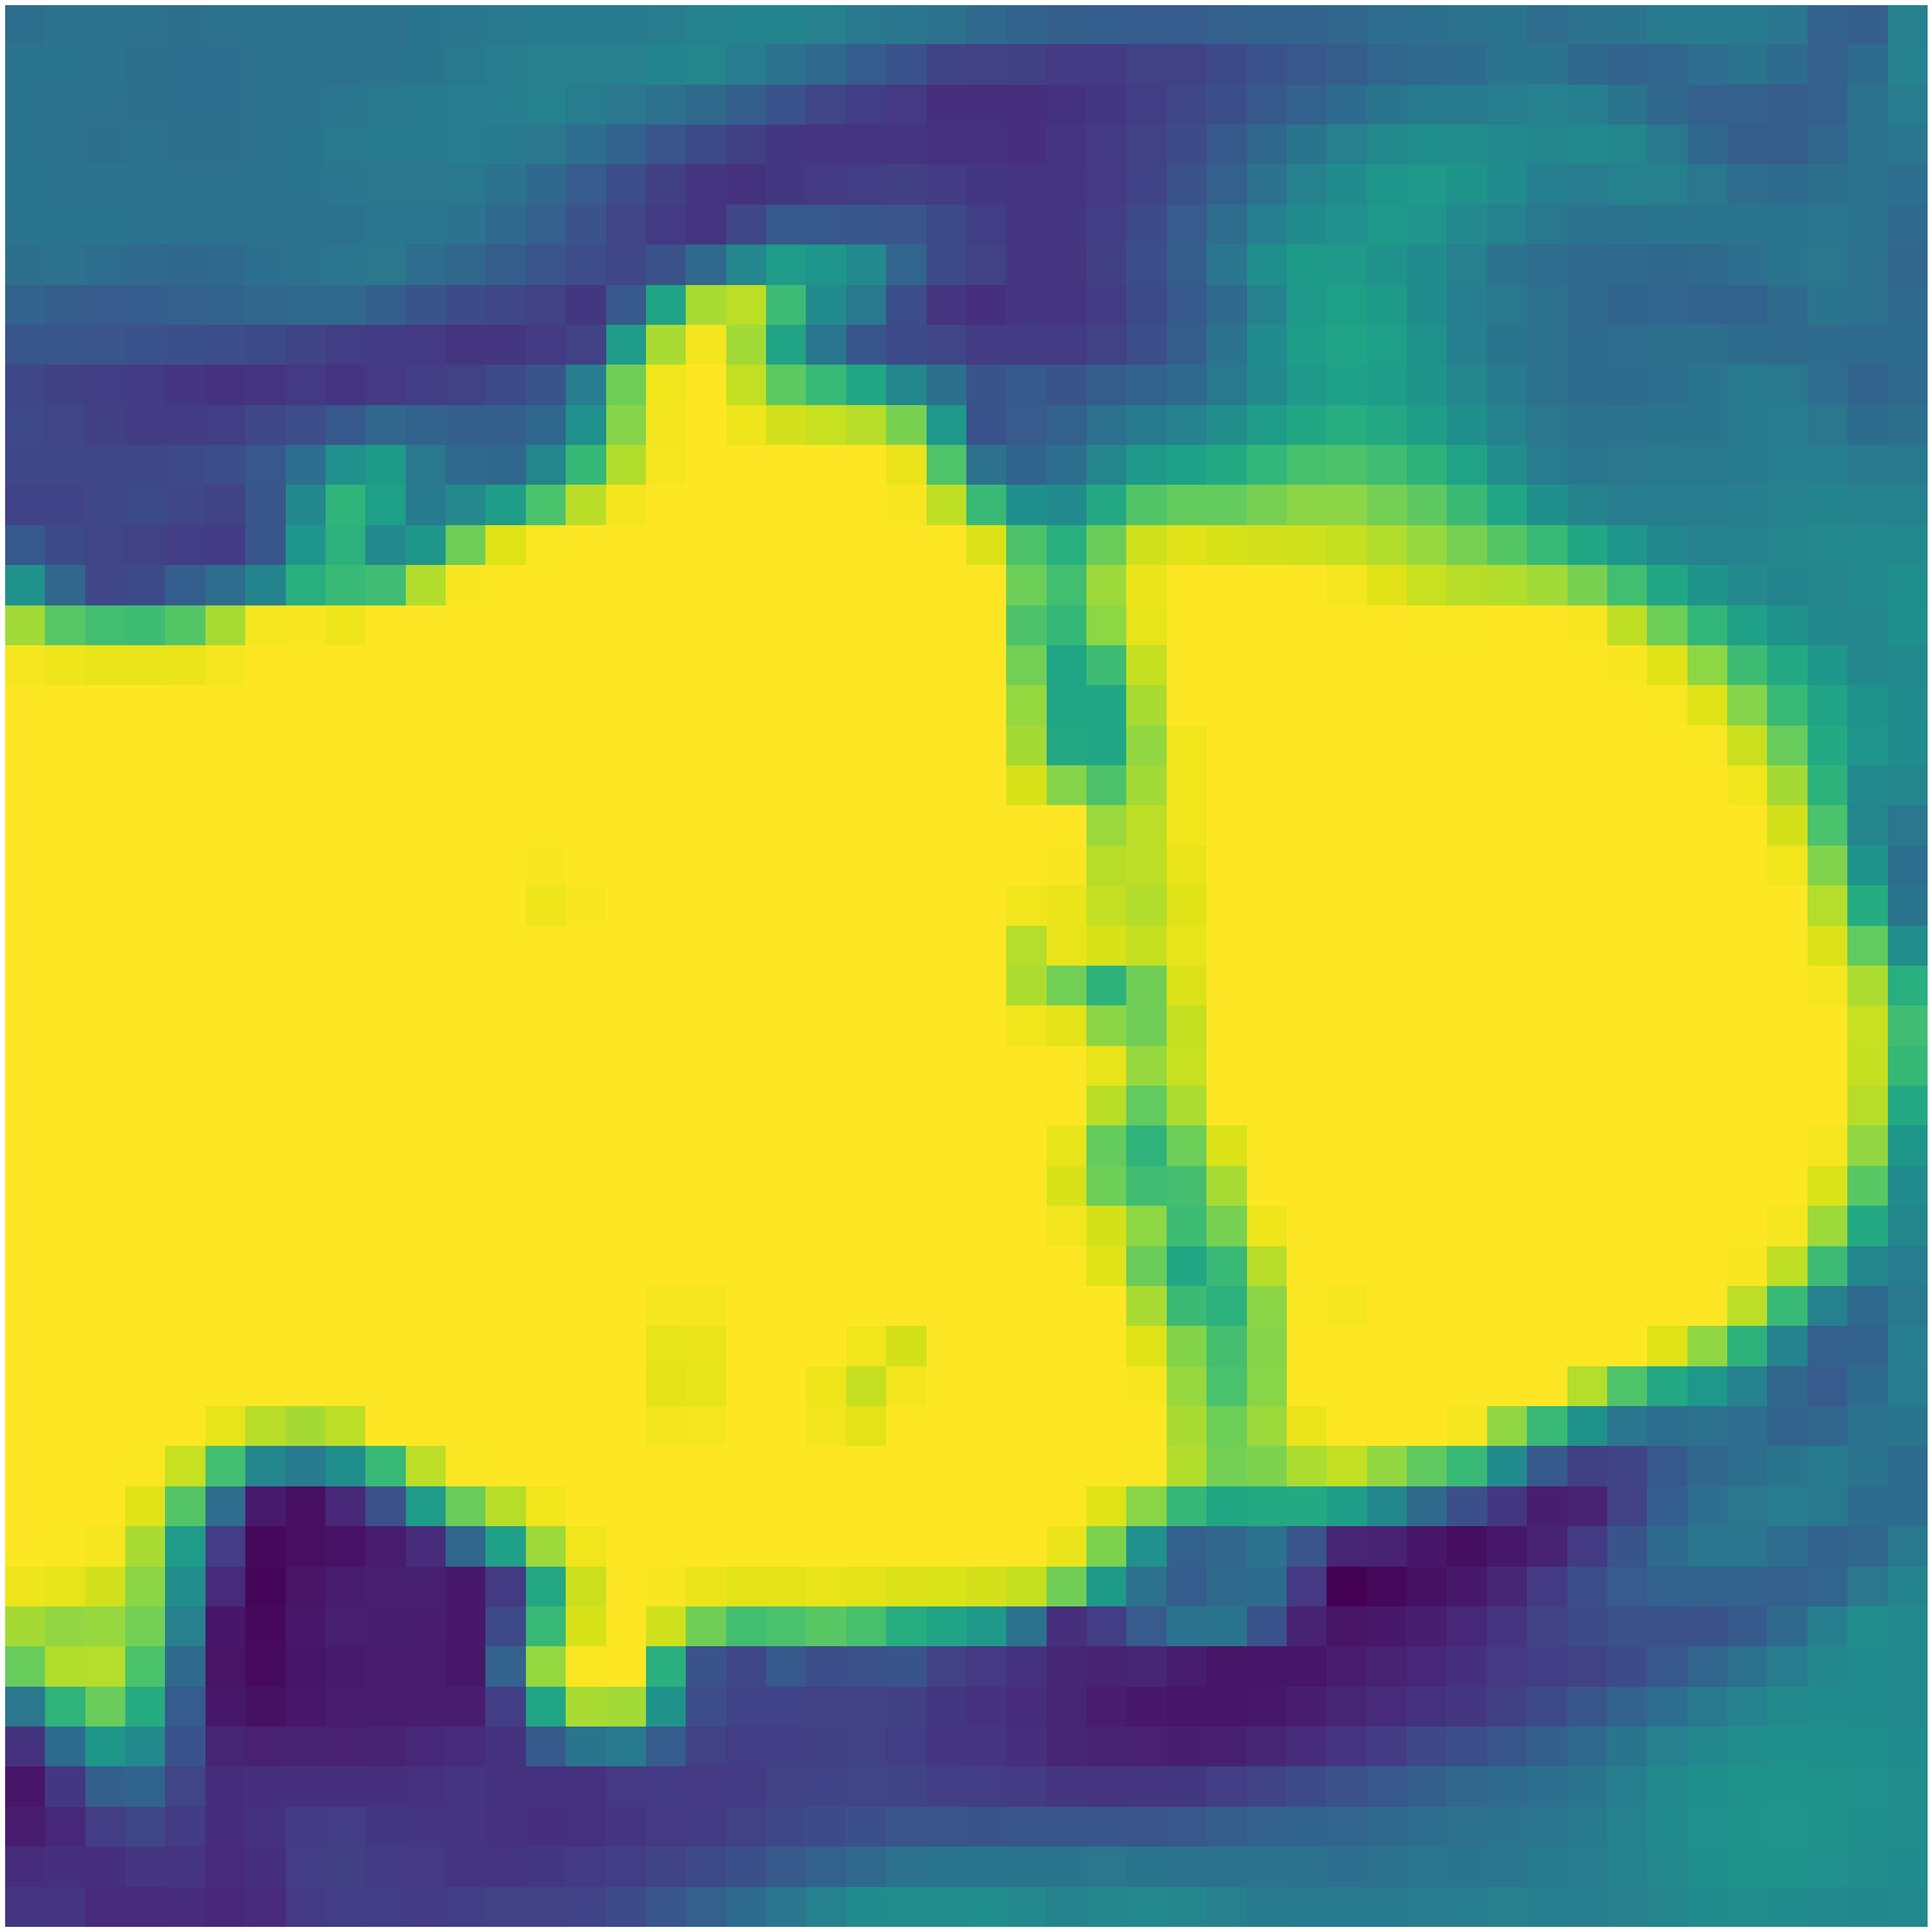

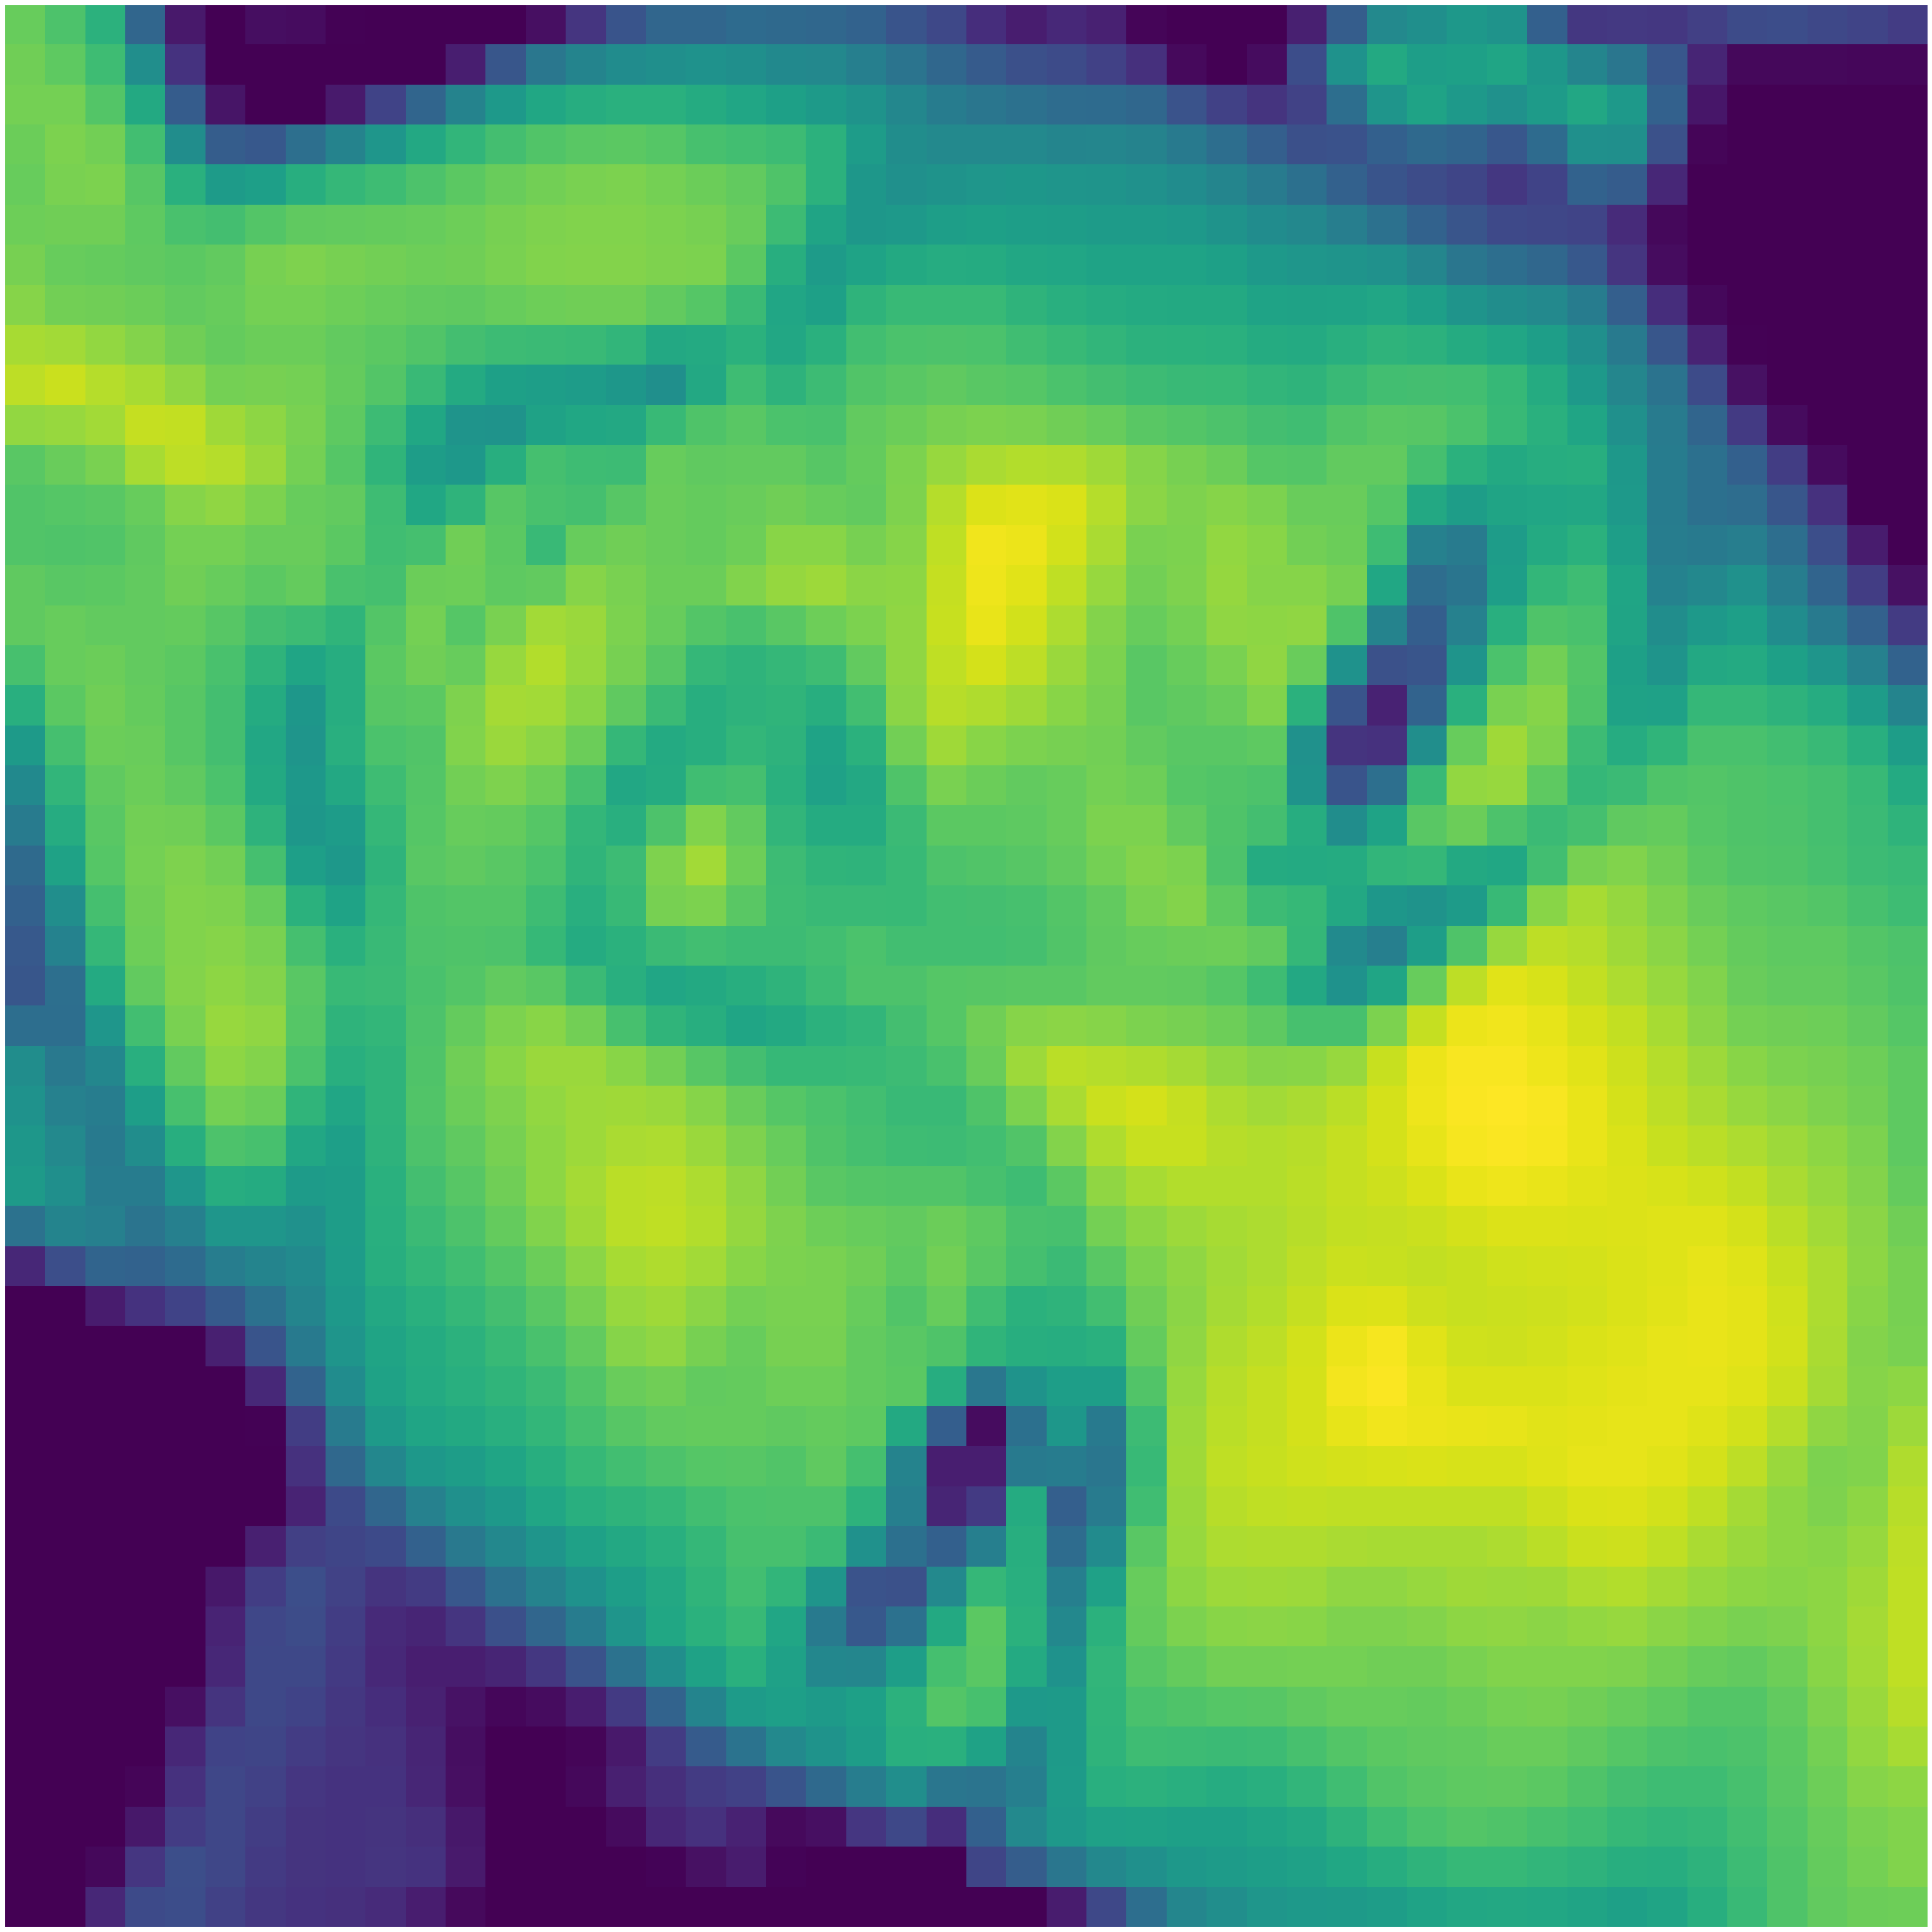

In [ ]:
  # Augmented img visualization
df = pd.read_csv('./fer2013.csv')
mat = np.zeros((48,48,1),dtype=np.uint8)
print("Printing images...")

# read the csv file line by line
for i in tqdm(range(9)):
    txt = df['pixels'][i]
    words = txt.split()

    # the image size is 48x48
    for j in range(2304):
        xind = j // 48
        yind = j % 48
        mat[xind][yind] = atoi(words[j])

    plt.figure(figsize=(48, 48))

    #image = tf.cast(tf.expand_dims(mat, 0), tf.float32)
    augmented_img = data_augmentation(mat)
    plt.imshow(augmented_img[:,:,0])
    plt.axis("off")

# **1. Data generating**

In [24]:
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
# os.system("Data_Preprocessing.ipynb")

'''
# Command line argument
ap = argparse.ArgumentParser()
ap.add_argument("--mode",help="train/display")
mode = ap.parse_args().mode
'''

# train if if you want to train the model and validate it
# fine_tune if you want to tune the weights with new dataset
# predict if you want to assess new dataset
# real_time if you want to assess in real-time
mode = "predict"

# Parameters of data generators
train_dir = 'data/train'
val_dir = 'data/train'
test_dir = 'data/test'

num_train = 28709
num_val = 7178
num_test = 7178
batch_size = 128
num_epoch = 50

opt = Adam(learning_rate=0.0001, decay=1e-6)

In [ ]:
# Define data generators
'''skf_df = np.array(os.listdir('SKF/'))

for train_index, val_index in skf.split(skf_df, y):
  train_data = skf_df[train_index]
  val_data = skf_df[val_index]'''

# Preprocessing : Normalization & Augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    featurewise_center=True,
    samplewise_center=True,
    featurewise_std_normalization=True,
    samplewise_std_normalization=True,
    rotation_range=90,
    width_shift_range=0.2,
    height_shift_range=0.2,
    brightness_range=[0.9, 1.1],
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    validation_split=0.2)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(48,48),
        batch_size=batch_size,
        color_mode="grayscale",
        class_mode='categorical', 
        shuffle = True)

validation_generator = val_datagen.flow_from_directory(
        test_dir,
        target_size=(48,48),
        batch_size=batch_size,
        color_mode="grayscale",
        class_mode='categorical', 
        shuffle = True)

test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(48,48),
        batch_size=batch_size,
        color_mode="grayscale",
        class_mode='categorical')

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


# **2. CNN Modeling**

In [ ]:
# Create the model -> VGG16
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48,48,1)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(7, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 44, 44, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 22, 22, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 22, 22, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 20, 20, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 10, 10, 128)      0         
 2D)                                                  

# **3. Performance evaluating functions**

In [ ]:
# 1. Accuracy and loss curves
def plot_model_history(model_history):
    """
    Plot Accuracy and Loss curves given the model_history
    """
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['accuracy'])+1),model_history.history['accuracy'])
    axs[0].plot(range(1,len(model_history.history['val_accuracy'])+1),model_history.history['val_accuracy'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['accuracy'])+1),len(model_history.history['accuracy'])/10)
    axs[0].legend(['train', 'val'], loc='best')

    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    fig.savefig('plot.png')
    plt.show()

In [33]:
# 2. Confusion matrix
import seaborn as sn

def Con_Mat(y_true, y_pred):
    Cmat = tf.math.confusion_matrix(y_true.argmax(axis=-1),y_pred.argmax(axis=-1))
    print(Cmat)
    df_cm = pd.DataFrame(Cmat, range(len(y_true)), range(len(y_pred)))
    sn.set(font_scale=1.4) # for label size
    sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size

    plt.show()

In [ ]:
# 3. Emotion Assess
def Emotion_Assess(prob, label_dict):
  label_pred = np.argmax(prob)
  label_order = np.argsort(prob)

  for i in range(3):
    ind = int(label_order[0][i].astype(int))
    print(label_dict[ind], ':')
    print(100*prob[0][ind], '%')
  return label_pred

In [ ]:
# 4. Save weights for K-cross validation
def get_model_name(k):
    return 'model_'+str(k)+'.h5'

# **4. Train & K-cross Validation**

**4-1. Training**

/usr/local/lib/python3.8/dist-packages/keras/preprocessing/image.py:1663: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.8/dist-packages/keras/preprocessing/image.py:1671: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/50
224/224 [==============================] - 381s 2s/step - loss: 1.8208 - accuracy: 0.2433 - val_loss: 1.8544 - val_accuracy: 0.2469
Epoch 2/50
224/224 [==============================] - 377s 2s/step - loss: 1.8075 - accuracy: 0.2479 - val_loss: 1.8593 - val_accuracy: 0.2475
Epoch 3/50
224/224 [==============================] - 377s 2s/step - loss: 1.7977 - accuracy: 0.2504 - val_loss: 1.8645 - val_accuracy: 0.2472
Epoch 4/50
224/224 [==============================] - 376s 2s/step - loss: 1.7900 - accuracy: 0.2536 - val_loss: 1.8541 - val_accuracy: 0.2480
Epoch 5/50
224/224 [==============================] - 375s 2s/step - loss: 1.7861 - accuracy: 0.2552 - val_loss: 1.8584 - val_accuracy: 0.2478
Epoch 6/50
224/224 [==============================] - 376s 2s/step - loss: 1.7821 - accuracy: 0.2567 - val_loss: 1.8467 - val_accuracy: 0.2479
Epoch 7/50
224/224 [==============================] - 376s 2s/step - loss: 1.7767 - accuracy: 0.2624 - val_loss: 1.8415 - val_accuracy: 0.2473

<ipython-input-15-c8a57c8eb54e>:13: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  axs[0].set_xticks(np.arange(1,len(model_history.history['accuracy'])+1),len(model_history.history['accuracy'])/10)
<ipython-input-15-c8a57c8eb54e>:22: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)


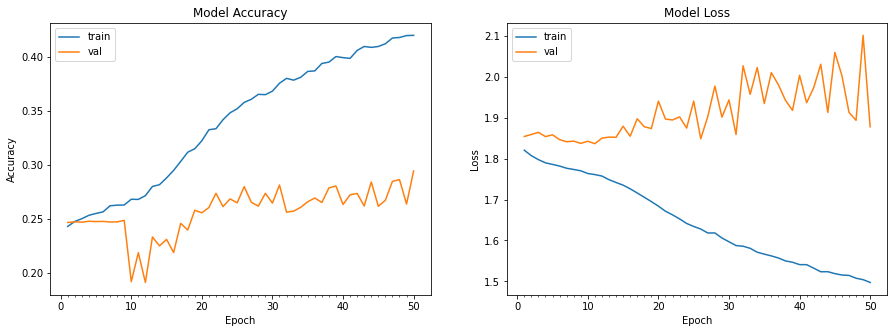

In [19]:
# Mode 1. Training & K cross validation
# If you want to train the same model or try other models, go for this
if mode == "train":
    model.compile(loss='categorical_crossentropy',optimizer=Adam(learning_rate=0.0001, decay=1e-6),metrics=['accuracy'])
    model_info = model.fit(
            train_generator,
            steps_per_epoch=num_train // batch_size,
            epochs=num_epoch,
            validation_data=test_generator,
            validation_steps=num_val // batch_size)
    
    # Performance measurement
    plot_model_history(model_info)

    # Transfer learning
    model.save_weights('model.h5')

In [ ]:
'''
VALIDATION_ACCURACY = []
    VALIDATION_LOSS = []

    save_dir = 'data/saved_models/'
    fold_var = 1

    for train_index, val_index in skf.split(np.zeros(len(Y)),Y):      
      # COMPILE NEW MODEL
      model.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['accuracy'])
      
      # CREATE CALLBACKS, Save weights for transfer learning
      checkpoint = tf.keras.callbacks.ModelCheckpoint(save_dir+get_model_name(fold_var), 
                  monitor='val_accuracy', verbose=1, 
                  save_best_only=True, mode='max')
      callbacks_list = [checkpoint]
      # There can be other callbacks, but just showing one because it involves the model name
      # This saves the best model
      # FIT THE MODEL
      model_info = model.fit(
            train_generator,
            steps_per_epoch=num_train // batch_size,
            epochs=num_epoch,
            callbacks=callbacks_list,
            validation_data=validation_generator,
            validation_steps=num_val // batch_size)
      #PLOT HISTORY
      plot_model_history(model_info)
      
      # LOAD BEST MODEL to evaluate the performance of the model
      model.load_weights("/saved_models/model_"+str(fold_var)+".h5")
      
      results = model.evaluate(validation_generator)
      results = dict(zip(model.metrics_names,results))
      
      VALIDATION_ACCURACY.append(results['accuracy'])
      VALIDATION_LOSS.append(results['loss'])
      
      tf.keras.backend.clear_session()
      
      fold_var += 1
    '''

 **4-2. Visualization**

In [20]:
# summarize feature map shapes
for i in range(len(model.layers)):
    layer = model.layers[i]
    # check for convolutional layer
    if '_conv' not in layer.name:
        continue
    # summarize output shape
    print(i, layer.name, layer.output.shape)

In [21]:
# retrieve weights from the second hidden layer, which is the first conv layer
filters, biases = model.layers[10].get_weights()

# normalize filter values to 0-1 so we can visualize them
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)

[[0.27407172 0.29185978 0.4576395  ... 0.3098182  0.71507746 0.26246226]
 [0.37882438 0.72059333 0.6997663  ... 0.7136225  0.5292271  0.52676153]
 [0.31943423 0.69041336 0.45732236 ... 0.67521685 0.49602407 0.5989888 ]
 ...
 [0.5211838  0.5054272  0.4317085  ... 0.64588994 0.46724308 0.74246776]
 [0.51836354 0.3613614  0.63970655 ... 0.45763034 0.6887657  0.6655429 ]
 [0.4891479  0.35212335 0.30145827 ... 0.26281372 0.39446875 0.32341358]]


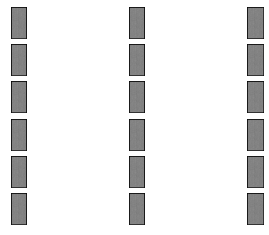

In [23]:
# plot first six filters
n_filters, ix = 6, 1
print(filters)
for i in range(n_filters):
    # get the filter
    f = filters[i, :]
    # plot each channel separately
    for j in range(3):
        # specify subplot and turn of axis
        ax = plt.subplot(n_filters, 3, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        # plot filter channel in grayscale
        plt.imshow(filters, cmap='gray')
        ix += 1
# show the figure
plt.show()

# **5. Test**

**6-1. Plain Test**

In [25]:
from google.colab import drive
from PIL import Image as im

In [31]:
if mode == "predict":
    model.load_weights('model.h5')
    correct = 0

    '''drive.mount('/content/drive')
    with open('/content/drive/My Drive/fer2013.csv', 'r') as f: 
      tmp = np.genfromtxt(f,delimiter=',')
    X = tmp[:,1]
    y = tmp[:,0] 
    
    for i in range(len(X)):
      array = np.reshape(X[i], (48, 48))  
      prediction = model.predict(array)
      maxindex = Emotion_Assess(prediction)
      if maxindex == y[i]:
        correct+=1
    '''
    # Number of prediction
    num_pred = 10
    y_pred = np.zeros((1, num_pred))
    TP = 0
    TN = 0
    FP = 0
    FN = 0

    df = pd.read_csv('./fer2013.csv')
    mat = np.zeros((48,48),dtype=np.uint8)
    print("Classifying images...")

    # dictionary which assigns each label an emotion (alphabetical order)
    emotion_dict = {0: "Angry", 1: "Disgusted", 2: "Fearful", 3: "Happy", 4: "Neutral", 5: "Sad", 6: "Surprised"}

    # read the csv file line by line
    for i in tqdm(range(num_pred)):
      txt = df['pixels'][i]
      words = txt.split()
      
      # the image size is 48x48
      for j in range(2304):
          xind = j // 48
          yind = j % 48
          mat[xind][yind] = atoi(words[j])

      prediction = model.predict(mat.reshape(1,48,48))
      print('\n Test sample %d' % i)
      maxindex = Emotion_Assess(prediction, emotion_dict)

      if maxindex == Y[i]:
        correct+=1
        if maxindex == 1:
          TP+=1
        else:
          TN+=1
      else:
        if maxindex == 1:
          FP+=1
        else:
          FN+=1

      y_pred[0, i] = maxindex
  

Classifying images...


  0%|          | 0/10 [00:00<?, ?it/s]

1/1 [==============================] - 0s 23ms/step

 Test sample 0
Angry :
0.0 %
Disgusted :
0.0 %
Fearful :
0.0 %
1/1 [==============================] - 0s 21ms/step


 20%|██        | 2/10 [00:00<00:00, 14.96it/s]


 Test sample 1
Disgusted :
0.0 %
Neutral :
2.848616800132979e-27 %
Sad :
2.5457204054642437e-21 %
1/1 [==============================] - 0s 95ms/step

 Test sample 2
Angry :
0.0 %
Disgusted :
0.0 %
Fearful :
0.0 %
1/1 [==============================] - 0s 24ms/step


 40%|████      | 4/10 [00:00<00:00, 11.17it/s]


 Test sample 3
Disgusted :
0.0 %
Surprised :
8.750611562841412e-22 %
Happy :
2.32705083330446e-18 %
1/1 [==============================] - 0s 20ms/step

 Test sample 4
Angry :
0.0 %
Disgusted :
0.0 %
Fearful :
0.0 %
1/1 [==============================] - 0s 20ms/step


 60%|██████    | 6/10 [00:00<00:00, 12.30it/s]


 Test sample 5
Disgusted :
0.0 %
Happy :
4.6861953908517634e-21 %
Sad :
6.4832649554117896e-15 %
1/1 [==============================] - 0s 23ms/step

 Test sample 6
Angry :
0.0 %
Disgusted :
0.0 %
Fearful :
0.0 %
1/1 [==============================] - 0s 31ms/step


 80%|████████  | 8/10 [00:00<00:00, 13.05it/s]


 Test sample 7
Disgusted :
0.0 %
Fearful :
0.0 %
Surprised :
0.0 %
1/1 [==============================] - 0s 21ms/step

 Test sample 8
Angry :
0.0 %
Disgusted :
0.0 %
Fearful :
0.0 %
1/1 [==============================] - 0s 20ms/step


100%|██████████| 10/10 [00:00<00:00, 13.09it/s]


 Test sample 9
Angry :
0.0 %
Disgusted :
0.0 %
Fearful :
0.0 %


In [ ]:
# Accuracy
acc = 100 * correct / num_pred
print('Accuracy: %f %%' % acc)  

# Confusion matrix
Con_Mat(Y[0:num_pred].values.reshape(1, num_pred), y_pred)

In [ ]:
from sklearn.metrics import plot_precision_recall_curve
disp = plot_precision_recall_curve(clf, X, y)
disp.ax_.set_title('2-class Precision-Recall curve: '
                  'AP={0:0.2f}'.format(precision))

In [ ]:
# F1 score
precision = TP/(TP+FP)
recall = TP/(TP+FN)
f1_score = 2*((precision*recall)/(precision+recall))
print('F1 score: %f' % f1_score)

**6-2. Real-time Simulation**

In [ ]:
# import dependencies
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from base64 import b64decode, b64encode
import cv2
import numpy as np
import PIL
import io
import html
import time

In [ ]:
# function to convert the JavaScript object into an OpenCV image
def js_to_image(js_reply):
  """
  Params:
          js_reply: JavaScript object containing image from webcam
  Returns:
          img: OpenCV BGR image
  """
  # decode base64 image
  image_bytes = b64decode(js_reply.split(',')[1])
  # convert bytes to numpy array
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  # decode numpy array into OpenCV BGR image
  img = cv2.imdecode(jpg_as_np, flags=1)

  return img

# function to convert OpenCV Rectangle bounding box image into base64 byte string to be overlayed on video stream
def bbox_to_bytes(bbox_array):
  """
  Params:
          bbox_array: Numpy array (pixels) containing rectangle to overlay on video stream.
  Returns:
        bytes: Base64 image byte string
  """
  # convert array into PIL image
  bbox_PIL = PIL.Image.fromarray(bbox_array, 'RGBA')
  iobuf = io.BytesIO()
  # format bbox into png for return
  bbox_PIL.save(iobuf, format='png')
  # format return string
  bbox_bytes = 'data:image/png;base64,{}'.format((str(b64encode(iobuf.getvalue()), 'utf-8')))

  return bbox_bytes

In [ ]:
# initialize the Haar Cascade face detection model
facecasc = cv2.CascadeClassifier(cv2.samples.findFile(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'))

In [ ]:
def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)

  # get photo data
  data = eval_js('takePhoto({})'.format(quality))
  # get OpenCV format image
  img = js_to_image(data) 
  # grayscale img
  gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
  print(gray.shape)
  # get face bounding box coordinates using Haar Cascade
  faces = facecasc.detectMultiScale(gray)
  # draw face bounding box on image
  for (x,y,w,h) in faces:
      img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
  # save image
  cv2.imwrite(filename, img)

  return filename

In [ ]:
# JavaScript to properly create our live video stream using our webcam as input
def video_stream():
  js = Javascript('''
    var video;
    var div = null;
    var stream;
    var captureCanvas;
    var imgElement;
    var labelElement;
    
    var pendingResolve = null;
    var shutdown = false;
    
    function removeDom() {
       stream.getVideoTracks()[0].stop();
       video.remove();
       div.remove();
       video = null;
       div = null;
       stream = null;
       imgElement = null;
       captureCanvas = null;
       labelElement = null;
    }
    
    function onAnimationFrame() {
      if (!shutdown) {
        window.requestAnimationFrame(onAnimationFrame);
      }
      if (pendingResolve) {
        var result = "";
        if (!shutdown) {
          captureCanvas.getContext('2d').drawImage(video, 0, 0, 640, 480);
          result = captureCanvas.toDataURL('image/jpeg', 0.8)
        }
        var lp = pendingResolve;
        pendingResolve = null;
        lp(result);
      }
    }
    
    async function createDom() {
      if (div !== null) {
        return stream;
      }

      div = document.createElement('div');
      div.style.border = '2px solid black';
      div.style.padding = '3px';
      div.style.width = '100%';
      div.style.maxWidth = '600px';
      document.body.appendChild(div);
      
      const modelOut = document.createElement('div');
      modelOut.innerHTML = "<span>Status:</span>";
      labelElement = document.createElement('span');
      labelElement.innerText = 'No data';
      labelElement.style.fontWeight = 'bold';
      modelOut.appendChild(labelElement);
      div.appendChild(modelOut);
           
      video = document.createElement('video');
      video.style.display = 'block';
      video.width = div.clientWidth - 6;
      video.setAttribute('playsinline', '');
      video.onclick = () => { shutdown = true; };
      stream = await navigator.mediaDevices.getUserMedia(
          {video: { facingMode: "environment"}});
      div.appendChild(video);

      imgElement = document.createElement('img');
      imgElement.style.position = 'absolute';
      imgElement.style.zIndex = 1;
      imgElement.onclick = () => { shutdown = true; };
      div.appendChild(imgElement);
      
      const instruction = document.createElement('div');
      instruction.innerHTML = 
          '<span style="color: red; font-weight: bold;">' +
          'When finished, click here or on the video to stop this demo</span>';
      div.appendChild(instruction);
      instruction.onclick = () => { shutdown = true; };
      
      video.srcObject = stream;
      await video.play();

      captureCanvas = document.createElement('canvas');
      captureCanvas.width = 640; //video.videoWidth;
      captureCanvas.height = 480; //video.videoHeight;
      window.requestAnimationFrame(onAnimationFrame);
      
      return stream;
    }
    async function stream_frame(label, imgData) {
      if (shutdown) {
        removeDom();
        shutdown = false;
        return '';
      }

      var preCreate = Date.now();
      stream = await createDom();
      
      var preShow = Date.now();
      if (label != "") {
        labelElement.innerHTML = label;
      }
            
      if (imgData != "") {
        var videoRect = video.getClientRects()[0];
        imgElement.style.top = videoRect.top + "px";
        imgElement.style.left = videoRect.left + "px";
        imgElement.style.width = videoRect.width + "px";
        imgElement.style.height = videoRect.height + "px";
        imgElement.src = imgData;
      }
      
      var preCapture = Date.now();
      var result = await new Promise(function(resolve, reject) {
        pendingResolve = resolve;
      });
      shutdown = false;
      
      return {'create': preShow - preCreate, 
              'show': preCapture - preShow, 
              'capture': Date.now() - preCapture,
              'img': result};
    }
    ''')

  display(js)
  
def video_frame(label, bbox):
  data = eval_js('stream_frame("{}", "{}")'.format(label, bbox))
  return data

<IPython.core.display.Javascript object>

(480, 640)
Saved to photo.jpg


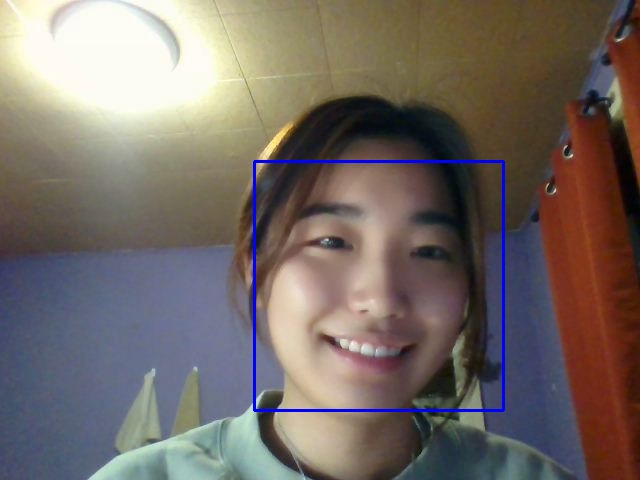

In [ ]:
# Mode 2. Real time detection test
# Emotions will be displayed on your face from the webcam feed
# Capturing the picture
if mode == "real_time":
  try:
    filename = take_photo('photo.jpg')
    print('Saved to {}'.format(filename))
    
    # Show the image which was just taken.
    display(Image(filename))
  
  except Exception as err:
    # Errors will be thrown if the user does not have a webcam or if they do not
    # grant the page permission to access it.
    print(str(err))

In [ ]:
if mode == "real_time":

  # start streaming video from webcam
  video_stream()
  model.load_weights('model.h5')

  # dictionary which assigns each label an emotion (alphabetical order)
  emotion_dict = {0: "Angry", 1: "Disgusted", 2: "Fearful", 3: "Happy", 4: "Neutral", 5: "Sad", 6: "Surprised"}

  # label for video
  label_html = 'Capturing...'

  # initialze bounding box to empty
  bbox = ''
  count = 0 
  while True:
      js_reply = video_frame(label_html, bbox)
      if not js_reply:
          break

      # convert JS response to OpenCV Image
      img = js_to_image(js_reply["img"])

      # create transparent overlay for bounding box
      bbox_array = np.zeros([480,640,4], dtype=np.uint8)

      # grayscale image for face detection
      gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

      # get face region coordinates
      faces = facecasc.detectMultiScale(gray)
      # get face bounding box for overlay
      for (x,y,w,h) in faces:
        bbox_array = cv2.rectangle(bbox_array, (x,y-50), (x+w,y+h+10), (0,255,0), 2)
        roi_gray = gray[y:y + h, x:x + w]
        cropped_img = np.expand_dims(np.expand_dims(cv2.resize(roi_gray, (48, 48)), -1), 0)

        prediction = model.predict(cropped_img)
        Emotion_Assess(prediction, emotion_dict)
        label_pred = np.argmax(prediction)
        label_order = np.argsort(prediction)
        txt = ''
        for i in range(3):
          ind = int(label_order[0][i].astype(int))
          txt += str(emotion_dict[ind]) + ':' + str(100*prediction[0][ind]) + '%\n'
              
        cv2.putText(frame, txt, (x, y), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2, cv2.LINE_AA)
        
      bbox_array[:,:,3] = (bbox_array.max(axis = 2) > 0 ).astype(int) * 255
      # convert overlay of bbox into bytes
      bbox_bytes = bbox_to_bytes(bbox_array)
      # update bbox so next frame gets new overlay
      bbox = bbox_bytes